# S&P500

In [1]:
#Paquetes para tratamiento de datos
import pandas as pd
import numpy as np

#Paquetes para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Quitar warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_context("paper")
plt.rc("font", size=14)

In [2]:
# S&P500 - Price

prices_ask = pd.read_csv(r"C:~TFG\Data\USA500IDXUSD_1 Min_Bid_2011.09.19_2023.02.26.csv", sep = ",")
prices_ask["Time (EET)"] = pd.to_datetime(prices_ask["Time (EET)"], format='%Y.%m.%d %H:%M:%S.%f')
prices_ask.set_index("Time (EET)", inplace=True)
prices_ask = prices_ask.between_time('16:30', '23:00')
prices_ask = prices_ask.loc['2013-03-01':]
prices_ask = prices_ask.dropna()

prices_5min_close = prices_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Close"].last()
prices_5min_open = prices_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Open"].first()
prices_5min_high = prices_ask.groupby([pd.Grouper(level =0, freq='5Min')])["High"].max()
prices_5min_low = prices_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Low"].min()

prices = pd.merge(prices_5min_open,prices_5min_close, how='inner', left_index=True, right_index=True)
prices = pd.merge(prices,prices_5min_high, how='inner', left_index=True, right_index=True)
prices = pd.merge(prices,prices_5min_low, how='inner', left_index=True, right_index=True)
prices = prices.dropna()

display(prices.head())
print("Cantidad de datos: ", len(prices))

,Open,Close,High,Low
Time (EET),,,,
2013-03-01 16:30:00,1513.131,1513.301,1513.355,1513.102
2013-03-01 16:35:00,1513.336,1513.103,1513.337,1513.098
2013-03-01 16:40:00,1513.226,1513.152,1513.348,1513.103
2013-03-01 16:45:00,1513.249,1513.267,1513.337,1513.142
2013-03-01 16:50:00,1513.124,1503.929,1513.359,1503.599


Cantidad de datos:  202653


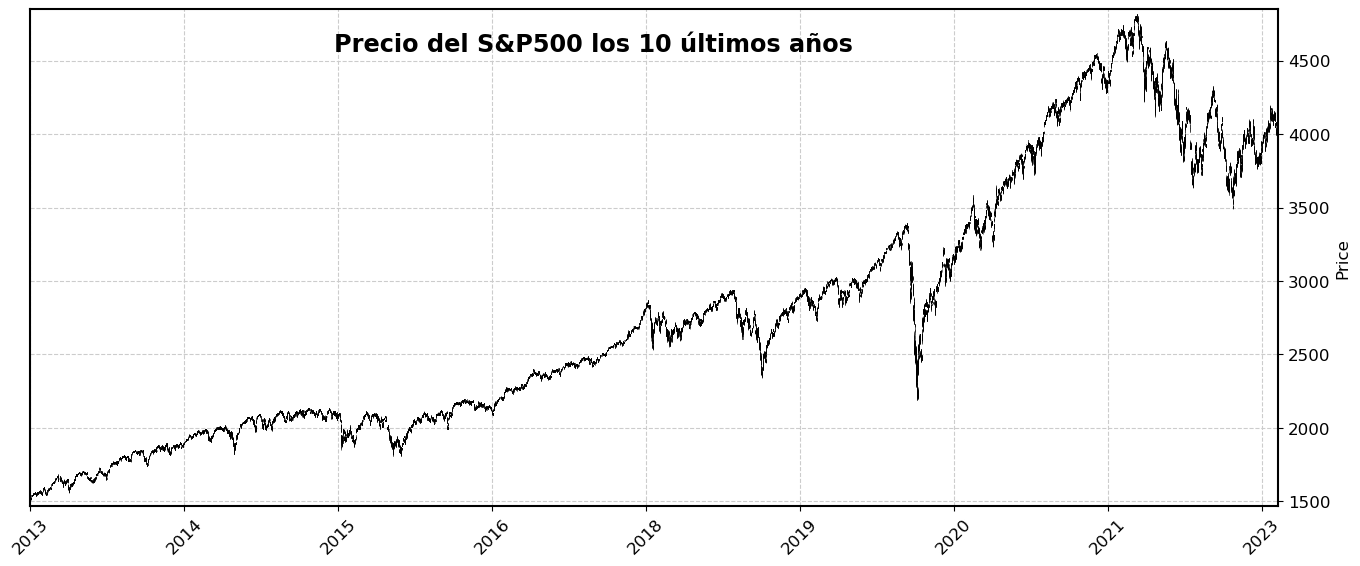

In [7]:
import mplfinance as mpf

mpf.plot(prices, type='candle', figratio=(10, 4), title = 'Precio del S&P500 los 10 últimos años',
         tight_layout = True, volume = False, style='classic', datetime_format='%Y')

In [5]:
#Calcular los retornos
#returns = (prices['Close'] - prices['Open'])/prices['Open']
returns = np.log(prices['Close']/prices['Close'].shift()).dropna()
returns = returns[returns != 0]
display(returns.head())
print("Cantidad de días: ", len(returns))

Time (EET)
2013-03-01 16:35:00   -0.000131
2013-03-01 16:40:00    0.000032
2013-03-01 16:45:00    0.000076
2013-03-01 16:50:00   -0.006190
2013-03-01 16:55:00    0.000730
Name: Close, dtype: float64

Cantidad de días:  192993


In [6]:
returns_sq = pd.DataFrame(returns**2)
returns_sq['Time (EET)'] = returns_sq.index

real_vol = np.log(np.sqrt(returns_sq.groupby([pd.Grouper(key='Time (EET)', freq='d')])["Close"].sum()))

real_vol = real_vol[real_vol > -50] #Quitar valores -inf

display(real_vol.head())
print("Cantidad de datos: ", len(real_vol))

Time (EET)
2013-03-01   -4.688677
2013-03-04   -5.206986
2013-03-05   -4.946116
2013-03-06   -5.350190
2013-03-07   -5.677612
Name: Close, dtype: float64

Cantidad de datos:  2582


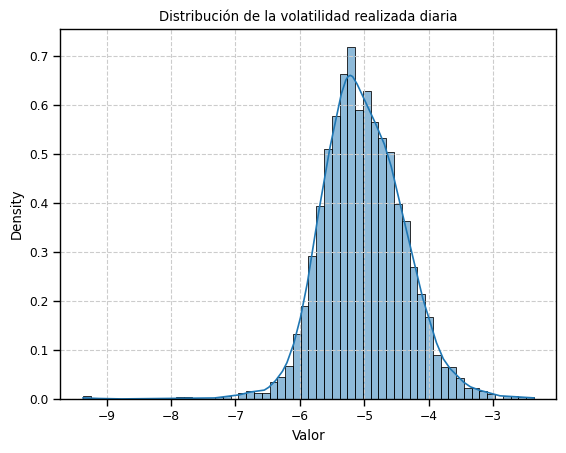

In [31]:
sns.set_context("paper")
sns.histplot(data=real_vol, kde=True, stat='density')
plt.title("Distribución de la volatilidad realizada diaria")
#plt.grid(axis = "y", color = "0.5")
plt.xlabel("Valor")

plt.show()

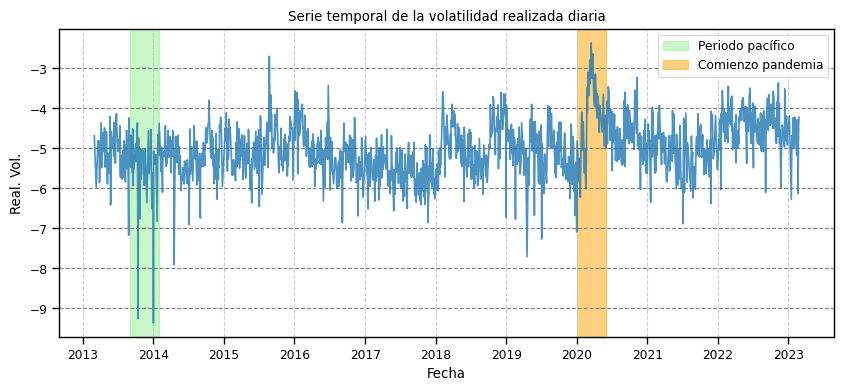

In [32]:
from datetime import datetime
from matplotlib.dates import date2num
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(data=real_vol, alpha = 0.8)
ax.axvspan(date2num(datetime(2013,9,1)), date2num(datetime(2014,2,1)), color='lightgreen', alpha=0.5, zorder=0, label='Periodo pacífico')
ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,1)), color='orange', alpha=0.5, zorder=0, label='Comienzo pandemia')
plt.legend()
plt.title("Serie temporal de la volatilidad realizada diaria")
plt.ylabel("Real. Vol.")
plt.grid(axis = "y", color = "0.5")
plt.xlabel("Fecha")

plt.show()

---
# ORO

In [8]:
# GOLD - Price

pricesG_ask = pd.read_csv(r"C:~TFG\Data\XAUUSD_1 Min_Bid_2003.05.05_2023.02.26.csv", sep = ",")
pricesG_ask["Time (EET)"] = pd.to_datetime(pricesG_ask["Time (EET)"], format='%Y.%m.%d %H:%M:%S.%f')
pricesG_ask.set_index("Time (EET)", inplace=True)
pricesG_ask = pricesG_ask.between_time('16:30', '23:00')
pricesG_ask = pricesG_ask.loc['2013-03-01':]
pricesG_ask = pricesG_ask.dropna()

pricesG_5min_close = pricesG_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Close"].last()
pricesG_5min_open = pricesG_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Open"].first()
pricesG_5min_high = pricesG_ask.groupby([pd.Grouper(level =0, freq='5Min')])["High"].max()
pricesG_5min_low = pricesG_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Low"].min()

pricesG = pd.merge(pricesG_5min_open,pricesG_5min_close, how='inner', left_index=True, right_index=True)
pricesG = pd.merge(pricesG,pricesG_5min_high, how='inner', left_index=True, right_index=True)
pricesG = pd.merge(pricesG,pricesG_5min_low, how='inner', left_index=True, right_index=True)
pricesG = pricesG.dropna()

display(pricesG.head())
print("Cantidad de datos: ", len(pricesG))

,Open,Close,High,Low
Time (EET),,,,
2013-03-01 16:30:00,1582.493,1583.433,1584.252,1581.152
2013-03-01 16:35:00,1583.352,1586.051,1586.167,1582.573
2013-03-01 16:40:00,1586.034,1585.493,1587.252,1585.153
2013-03-01 16:45:00,1585.473,1584.978,1585.552,1584.006
2013-03-01 16:50:00,1585.052,1582.973,1585.278,1581.947


Cantidad de datos:  202175


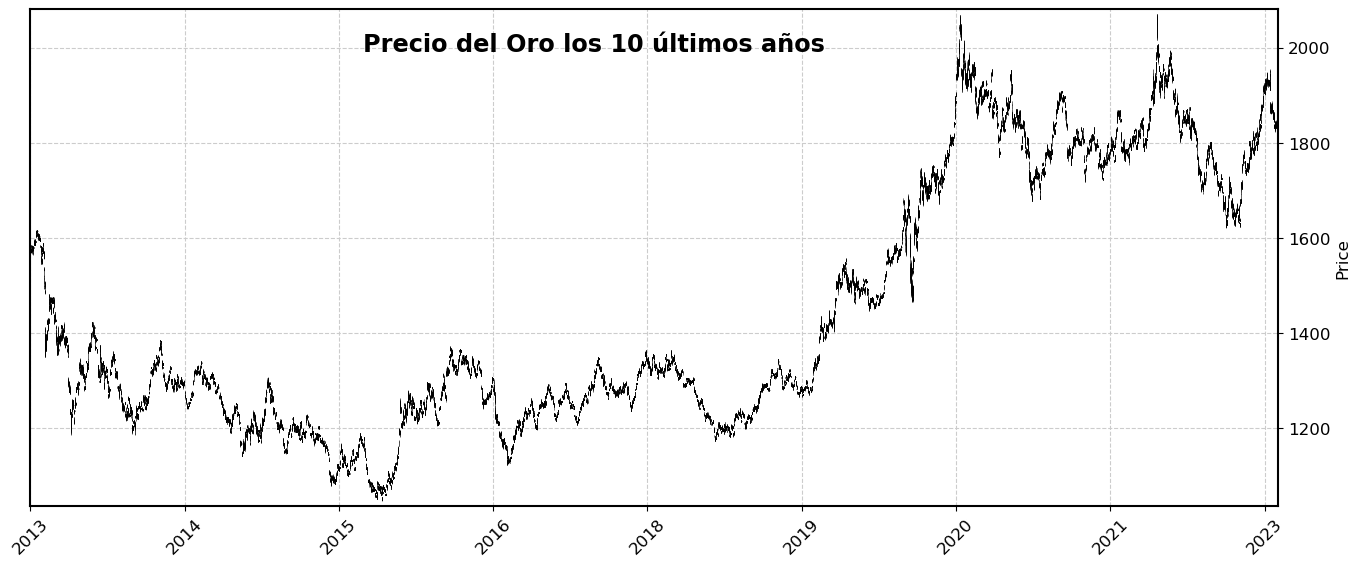

In [10]:
mpf.plot(pricesG, type='candle', figratio=(10, 4), title = 'Precio del Oro los 10 últimos años',
         tight_layout = True, volume = False, style='classic', datetime_format='%Y')

In [8]:
#Calcular los retornos
#returns = (prices['Close'] - prices['Open'])/prices['Open']
returns_gold = np.log(pricesG['Close']/pricesG['Close'].shift()).dropna()
returns_gold = returns_gold[returns_gold != 0]
display(returns_gold.head())
print("Cantidad de días: ", len(returns_gold))

Time (EET)
2013-03-01 16:35:00    0.001652
2013-03-01 16:40:00   -0.000352
2013-03-01 16:45:00   -0.000325
2013-03-01 16:50:00   -0.001266
2013-03-01 16:55:00    0.000878
Name: Close, dtype: float64

Cantidad de días:  199268


In [9]:
returns_sq_Gold = pd.DataFrame(returns_gold**2)
returns_sq_Gold['Time (EET)'] = returns_sq_Gold.index

real_vol_Gold = np.log(np.sqrt(returns_sq_Gold.groupby([pd.Grouper(key='Time (EET)', freq='d')])["Close"].sum()))

real_vol_Gold = real_vol_Gold[real_vol_Gold > -50] #Quitar valores -inf

display(real_vol_Gold.head())
print("Cantidad de datos: ", len(real_vol_Gold))

Time (EET)
2013-03-01   -5.132861
2013-03-04   -5.476839
2013-03-05   -5.018270
2013-03-06   -5.135274
2013-03-07   -5.415768
Name: Close, dtype: float64

Cantidad de datos:  2577


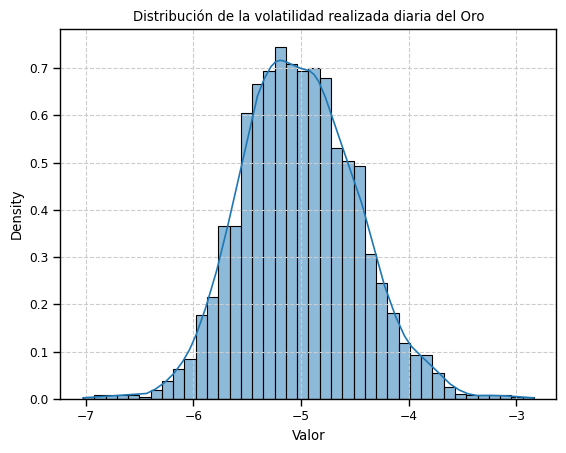

In [37]:
sns.set_context("paper")
sns.histplot(data=real_vol_Gold, kde=True, stat='density')
plt.title("Distribución de la volatilidad realizada diaria del Oro")
#plt.grid(axis = "y", color = "0.5")
plt.xlabel("Valor")

plt.show()

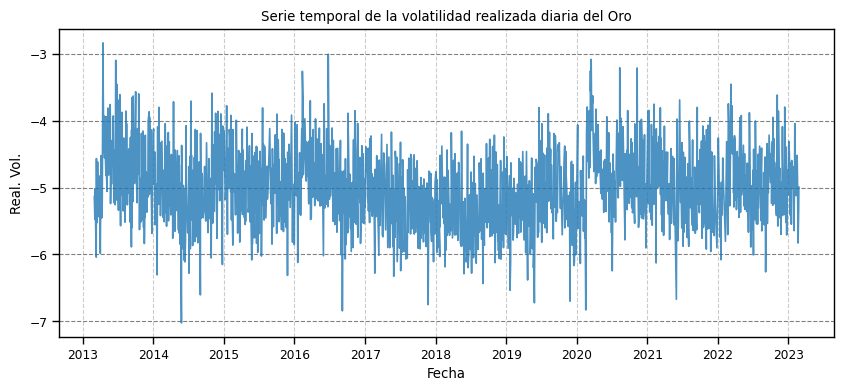

In [38]:
from datetime import datetime
from matplotlib.dates import date2num
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(data=real_vol_Gold, alpha = 0.8)
#ax.axvspan(date2num(datetime(2013,9,1)), date2num(datetime(2014,2,1)), color='lightgreen', alpha=0.5, zorder=0, label='Periodo pacífico')
#ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,1)), color='orange', alpha=0.5, zorder=0, label='Comienzo pandemia')
#plt.legend()
plt.title("Serie temporal de la volatilidad realizada diaria del Oro")
plt.ylabel("Real. Vol.")
plt.grid(axis = "y", color = "0.5")
plt.xlabel("Fecha")

plt.show()

In [39]:
#Rolling correlation Volatilidad Oro -  S&P500
corr_price_gold = pd.merge(real_vol_Gold, real_vol, how='inner', on='Time (EET)')
corr_price_gold["shift S&P"] = corr_price_gold["Close_y"].shift(-1)
corr_price_gold = corr_price_gold.drop(["Close_y"], axis=1)
corr_price_gold.columns = ['Vol. Oro', 'Vol. S&P500 shift']

display(corr_price_gold.head())
print("Cantidad de datos: ", len(corr_price_gold))

,Vol. Oro,Vol. S&P500 shift
Time (EET),,
2013-03-01,-5.132861,-5.206986
2013-03-04,-5.476839,-4.946116
2013-03-05,-5.018270,-5.350190
2013-03-06,-5.135274,-5.677612
2013-03-07,-5.415768,-5.135699


Cantidad de datos:  2576


In [40]:
corrgold_1week = corr_price_gold["Vol. Oro"].rolling(5).corr(corr_price_gold["Vol. S&P500 shift"]) 
corrgold_1week = corrgold_1week.dropna()

corrgold_3month = corr_price_gold["Vol. Oro"].rolling(60).corr(corr_price_gold["Vol. S&P500 shift"]) 
corrgold_3month = corrgold_3month.dropna()

corrgold_6month = corr_price_gold["Vol. Oro"].rolling(120).corr(corr_price_gold["Vol. S&P500 shift"]) 
corrgold_6month = corrgold_6month.dropna()

display(corrgold_1week.head())
print("Cantidad de datos: ", len(corrgold_1week))

Time (EET)
2013-03-07   -0.707863
2013-03-08   -0.912237
2013-03-11   -0.442985
2013-03-12   -0.605497
2013-03-13   -0.595000
dtype: float64

Cantidad de datos:  2571


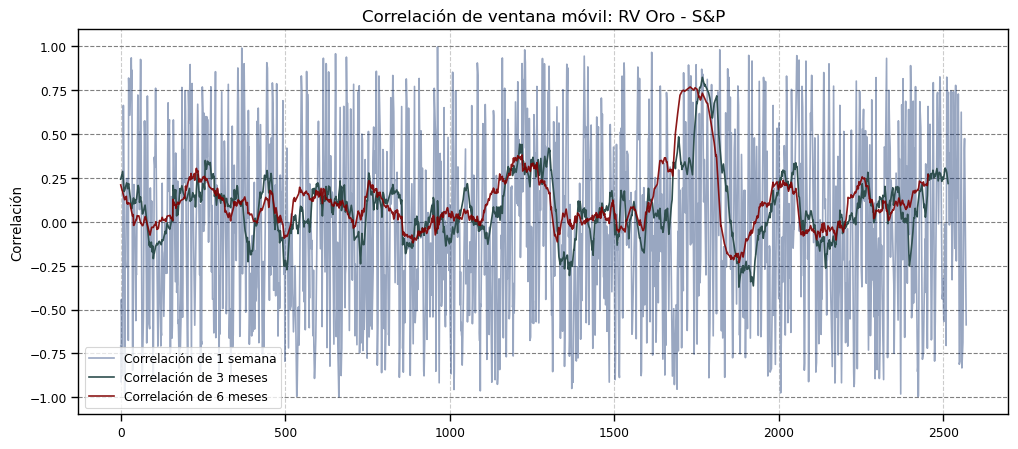

In [41]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


plt.plot(range(0,len(corrgold_1week)), corrgold_1week, alpha = 0.4, color = '#002366', label = "Correlación de 1 semana")

plt.plot(range(0,len(corrgold_3month)),corrgold_3month, alpha = 1, color = 'darkslategrey', label = "Correlación de 3 meses")

plt.plot(range(0,len(corrgold_6month)),corrgold_6month, alpha = 0.9, color = 'maroon', label = "Correlación de 6 meses")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Correlación de ventana móvil: RV Oro - S&P", fontsize = 12)
plt.ylabel("Correlación")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

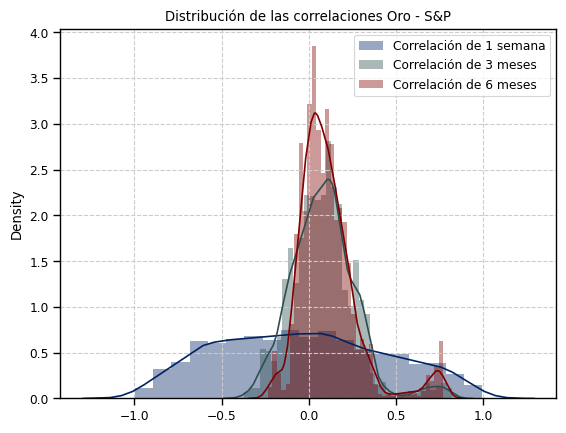

In [42]:
sns.set_context("paper")
sns.distplot(corrgold_1week, label = "Correlación de 1 semana", color = "#002366")
sns.distplot(corrgold_3month, kde=True, color = "darkslategrey", label = "Correlación de 3 meses")
sns.distplot(corrgold_6month, kde=True, label = "Correlación de 6 meses", color = "maroon",)

plt.title("Distribución de las correlaciones Oro - S&P")
plt.legend()
plt.show()

In [43]:
from scipy.stats import skew

print("Muestra de entrenamiento")
print("Media: ", np.mean(corrgold_1week))
print("Varianza: ", np.std(corrgold_1week, ddof = 1))
print("Skewness: ", skew(corrgold_1week))
print("#####################")
print("Muestra de validación")
print("Media: ", np.mean(corrgold_3month))
print("Varianza: ", np.std(corrgold_3month, ddof = 1))
print("Skewness: ", skew(corrgold_3month))
print("#####################")
print("Muestra de test")
print("Media: ", np.mean(corrgold_6month))
print("Varianza: ", np.std(corrgold_6month, ddof = 1))
print("Skewness: ", skew(corrgold_6month))

Muestra de entrenamiento
Media:  -0.03990693783899345
Varianza:  0.475843442128857
Skewness:  0.13847329616558823
#####################
Muestra de validación
Media:  0.08718282085268667
Varianza:  0.18767831182091335
Skewness:  0.8336494447756126
#####################
Muestra de test
Media:  0.111544325504981
Varianza:  0.1754210128266416
Skewness:  1.6963310356510806


---

# Petróleo

In [11]:
# OIL - Price

pricesO_ask = pd.read_csv(r"C:~TFG\Data\BRENTCMDUSD_1 Min_Bid_2010.12.02_2023.02.26.csv", sep = ",")
pricesO_ask["Time (EET)"] = pd.to_datetime(pricesO_ask["Time (EET)"], format='%Y.%m.%d %H:%M:%S.%f')
pricesO_ask.set_index("Time (EET)", inplace=True)
pricesO_ask = pricesO_ask.between_time('16:30', '23:00')
pricesO_ask = pricesO_ask.loc['2013-03-01':]
pricesO_ask = pricesO_ask.dropna()

pricesO_5min_close = pricesO_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Close"].last()
pricesO_5min_open = pricesO_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Open"].first()
pricesO_5min_high = pricesO_ask.groupby([pd.Grouper(level =0, freq='5Min')])["High"].max()
pricesO_5min_low = pricesO_ask.groupby([pd.Grouper(level =0, freq='5Min')])["Low"].min()

pricesO = pd.merge(pricesO_5min_open,pricesO_5min_close, how='inner', left_index=True, right_index=True)
pricesO = pd.merge(pricesO,pricesO_5min_high, how='inner', left_index=True, right_index=True)
pricesO = pd.merge(pricesO,pricesO_5min_low, how='inner', left_index=True, right_index=True)
pricesO = pricesO.dropna()

display(pricesO.head())
print("Cantidad de datos: ", len(pricesO))

,Open,Close,High,Low
Time (EET),,,,
2013-03-01 16:30:00,108.439,108.438,108.44,108.438
2013-03-01 16:35:00,108.440,108.440,108.44,108.438
2013-03-01 16:40:00,108.440,108.439,108.44,108.438
2013-03-01 16:45:00,108.439,108.440,108.44,108.438
2013-03-01 16:50:00,108.439,108.219,108.44,108.209


Cantidad de datos:  204464


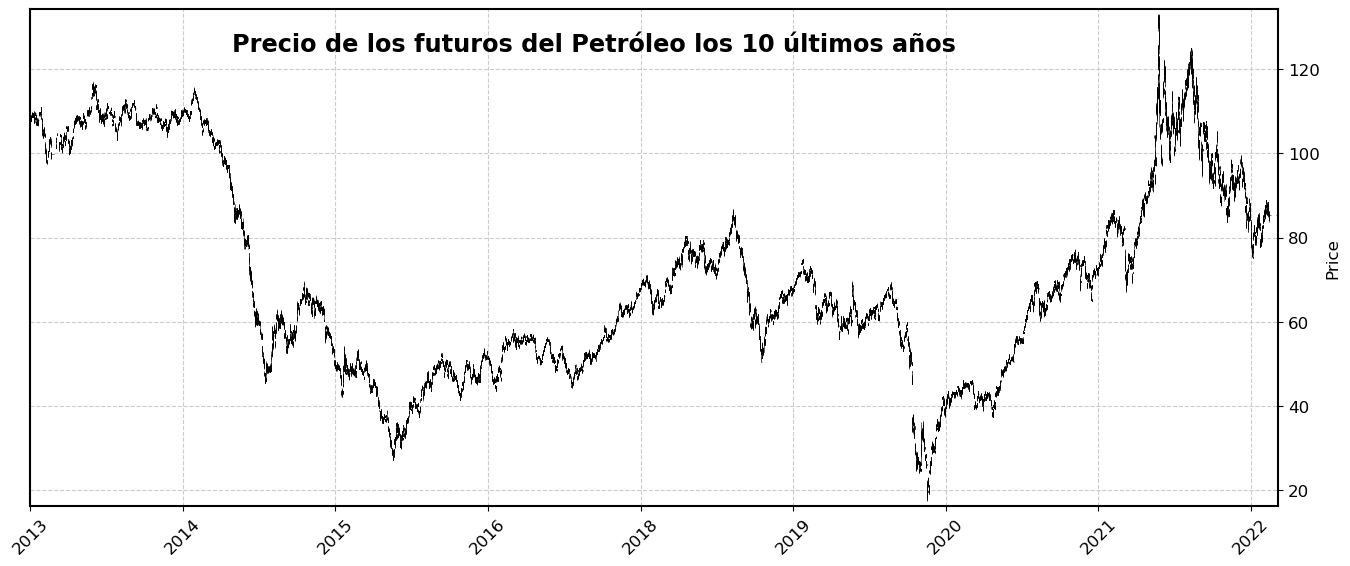

In [12]:
mpf.plot(pricesO, type='candle', figratio=(10, 4), title = 'Precio de los futuros del Petróleo los 10 últimos años',
         tight_layout = True, volume = False, style='classic', datetime_format='%Y')

In [11]:
#Calcular los retornos
#returns = (prices['Close'] - prices['Open'])/prices['Open']
returns_oil = np.log(pricesO['Close']/pricesO['Close'].shift()).dropna()
returns_oil = returns_oil[returns_oil != 0]
display(returns_oil.head())
print("Cantidad de días: ", len(returns_oil))

Time (EET)
2013-03-01 16:35:00    0.000018
2013-03-01 16:40:00   -0.000009
2013-03-01 16:45:00    0.000009
2013-03-01 16:50:00   -0.002040
2013-03-01 16:55:00   -0.000841
Name: Close, dtype: float64

Cantidad de días:  189242


In [12]:
returns_sq_Oil = pd.DataFrame(returns_oil**2)
returns_sq_Oil['Time (EET)'] = returns_sq_Oil.index

real_vol_Oil = np.log(np.sqrt(returns_sq_Oil.groupby([pd.Grouper(key='Time (EET)', freq='d')])["Close"].sum()))

real_vol_Oil = real_vol_Oil[real_vol_Oil > -50] #Quitar valores -inf

display(real_vol_Oil.head())
print("Cantidad de datos: ", len(real_vol_Oil))

Time (EET)
2013-03-01   -4.890433
2013-03-04   -4.825482
2013-03-05   -4.666629
2013-03-06   -4.873045
2013-03-07   -5.044444
Name: Close, dtype: float64

Cantidad de datos:  2551


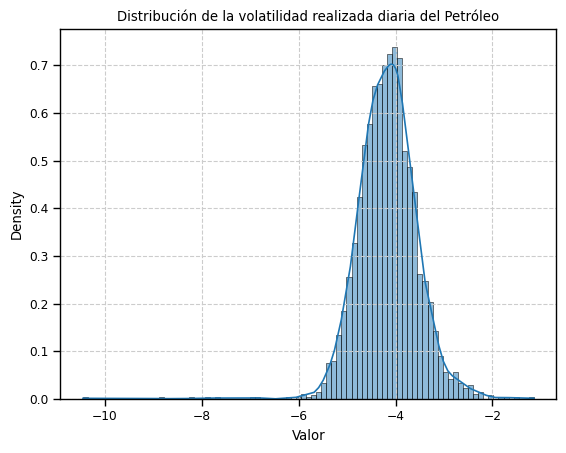

In [48]:
sns.set_context("paper")
sns.histplot(data=real_vol_Oil, kde=True, stat='density')
plt.title("Distribución de la volatilidad realizada diaria del Petróleo")
#plt.grid(axis = "y", color = "0.5")
plt.xlabel("Valor")

plt.show()

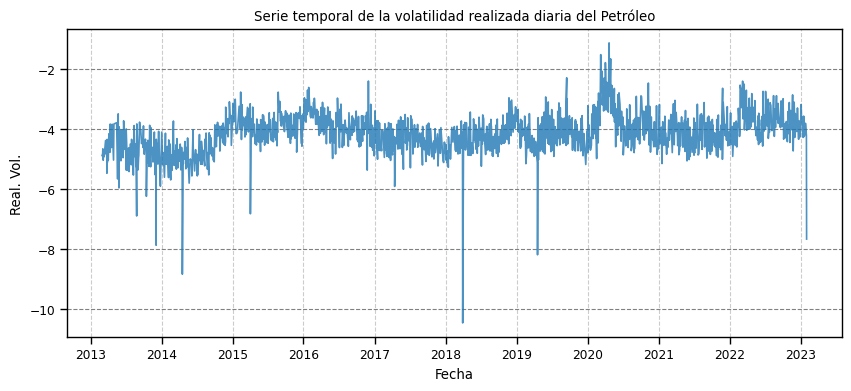

In [49]:
from datetime import datetime
from matplotlib.dates import date2num
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(data=real_vol_Oil, alpha = 0.8)
#ax.axvspan(date2num(datetime(2013,9,1)), date2num(datetime(2014,2,1)), color='lightgreen', alpha=0.5, zorder=0, label='Periodo pacífico')
#ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,1)), color='orange', alpha=0.5, zorder=0, label='Comienzo pandemia')
#plt.legend()
plt.title("Serie temporal de la volatilidad realizada diaria del Petróleo")
plt.ylabel("Real. Vol.")
plt.grid(axis = "y", color = "0.5")
plt.xlabel("Fecha")

plt.show()

In [50]:
#Rolling correlation Volatilidad Oro -  S&P500
corr_price_oil = pd.merge(real_vol_Oil, real_vol, how='inner', on='Time (EET)')
corr_price_oil["shift S&P"] = corr_price_oil["Close_y"].shift(-1)
corr_price_oil = corr_price_oil.drop(["Close_y"], axis=1)
corr_price_oil.columns = ['Vol. Oil', 'Vol. S&P500 shift']

display(corr_price_oil.head())
print("Cantidad de datos: ", len(corr_price_oil))

,Vol. Oil,Vol. S&P500 shift
Time (EET),,
2013-03-01,-4.890433,-5.206986
2013-03-04,-4.825482,-4.946116
2013-03-05,-4.666629,-5.350190
2013-03-06,-4.873045,-5.677612
2013-03-07,-5.044444,-5.135699


Cantidad de datos:  2548


In [51]:
corroil_1week = corr_price_oil["Vol. Oil"].rolling(5).corr(corr_price_oil["Vol. S&P500 shift"]) 
corroil_1week = corroil_1week.dropna()

corroil_3month = corr_price_oil["Vol. Oil"].rolling(60).corr(corr_price_oil["Vol. S&P500 shift"]) 
corroil_3month = corroil_3month.dropna()

corroil_6month = corr_price_oil["Vol. Oil"].rolling(120).corr(corr_price_oil["Vol. S&P500 shift"]) 
corroil_6month = corroil_6month.dropna()

display(corroil_1week.head())
print("Cantidad de datos: ", len(corroil_1week))

Time (EET)
2013-03-07   -0.173037
2013-03-08   -0.192462
2013-03-12   -0.140590
2013-03-13   -0.690890
2013-03-14   -0.597306
dtype: float64

Cantidad de datos:  2543


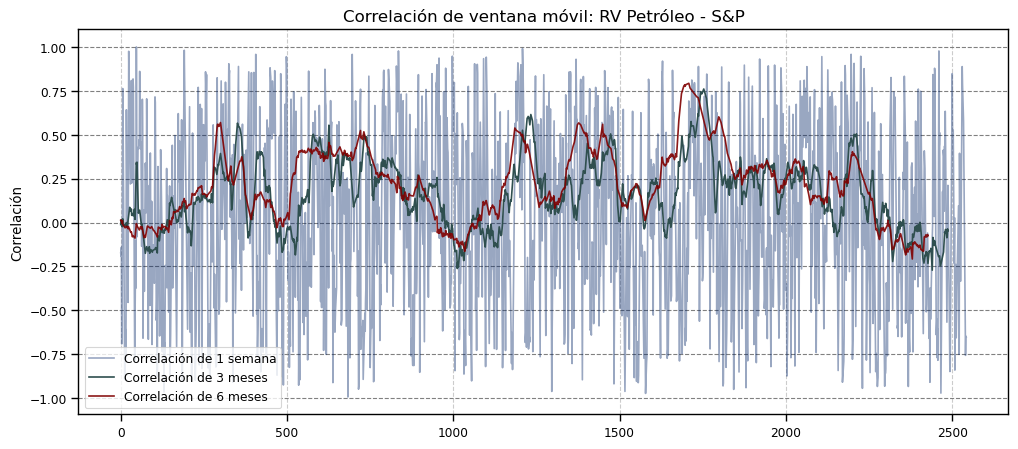

In [52]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


plt.plot(range(0,len(corroil_1week)), corroil_1week, alpha = 0.4, color = '#002366', label = "Correlación de 1 semana")

plt.plot(range(0,len(corroil_3month)),corroil_3month, alpha = 1, color = 'darkslategrey', label = "Correlación de 3 meses")

plt.plot(range(0,len(corroil_6month)),corroil_6month, alpha = 0.9, color = 'maroon', label = "Correlación de 6 meses")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Correlación de ventana móvil: RV Petróleo - S&P", fontsize = 12)
plt.ylabel("Correlación")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

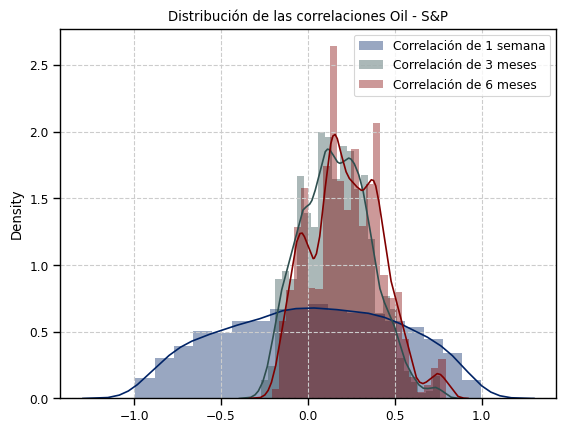

In [53]:
sns.set_context("paper")
sns.distplot(corroil_1week, label = "Correlación de 1 semana", color = "#002366")
sns.distplot(corroil_3month, kde=True, color = "darkslategrey", label = "Correlación de 3 meses")
sns.distplot(corroil_6month, kde=True, label = "Correlación de 6 meses", color = "maroon",)

plt.title("Distribución de las correlaciones Oil - S&P")
plt.legend()
plt.show()

In [54]:
print("Muestra de entrenamiento")
print("Media: ", np.mean(corroil_1week))
print("Varianza: ", np.std(corroil_1week, ddof = 1))
print("Skewness: ", skew(corroil_1week))
print("#####################")
print("Muestra de validación")
print("Media: ", np.mean(corroil_3month))
print("Varianza: ", np.std(corroil_3month, ddof = 1))
print("Skewness: ", skew(corroil_3month))
print("#####################")
print("Muestra de test")
print("Media: ", np.mean(corroil_6month))
print("Varianza: ", np.std(corroil_6month, ddof = 1))
print("Skewness: ", skew(corroil_6month))

Muestra de entrenamiento
Media:  0.02142933778396713
Varianza:  0.48257982885445466
Skewness:  -0.05582948839908705
#####################
Muestra de validación
Media:  0.16353616247697453
Varianza:  0.1957329312035429
Skewness:  0.24347565608262678
#####################
Muestra de test
Media:  0.2204340014704248
Varianza:  0.20374883579407937
Skewness:  0.256554877081052


---

# Índices

Economic Policy Uncertainty Index (daily)

Baker, Scott R., Bloom, Nick and Davis, Stephen J., Economic Policy Uncertainty Index for United States [USEPUINDXD], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/USEPUINDXD, May 3, 2023.

In [13]:
unc_index = pd.read_csv(r"C:~TFG\Data\EconomicPolicyUncertaintyIndex.csv", sep = ",")
unc_index["Time (EET)"] = pd.to_datetime(unc_index["DATE"], format='%Y.%m.%d %H:%M:%S.%f')
unc_index.set_index("Time (EET)", inplace=True)
unc_index = unc_index.loc['2013-03-01':]
unc_index = unc_index.dropna()
unc_index = unc_index.drop(["DATE"], axis=1)

display(unc_index.head())
print("Cantidad de datos: ", len(unc_index))

,USEPUINDXD
Time (EET),
2013-03-01,324.04
2013-03-02,202.86
2013-03-03,122.32
2013-03-04,160.70
2013-03-05,144.85


Cantidad de datos:  3715


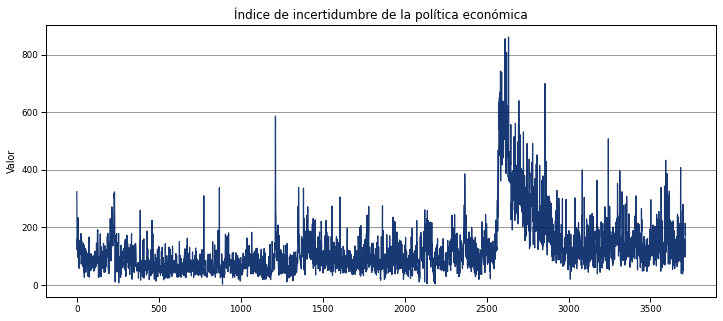

In [14]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


plt.plot(range(0,len(unc_index)), unc_index, alpha = 0.9, color = '#002366')

plt.ticklabel_format(useOffset=False) 
plt.title("Índice de incertidumbre de la política económica", fontsize = 12)
plt.ylabel("Valor")
plt.xlabel("")
plt.grid(axis = "y", color = "0.5")
plt.show()

In [15]:
unc_dat = np.log(unc_index/unc_index.shift()).dropna()
#unc_dat = unc_dat[unc_dat != 0]
display(unc_dat.head())
print("Cantidad de días: ", len(unc_dat))

,USEPUINDXD
Time (EET),
2013-03-02,-0.468351
2013-03-03,-0.505876
2013-03-04,0.272899
2013-03-05,-0.103841
2013-03-06,0.174988


Cantidad de días:  3714


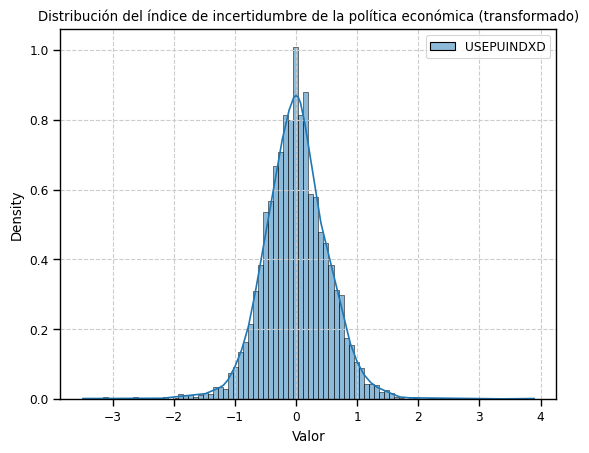

In [58]:
sns.set_context("paper")
sns.histplot(data=unc_dat, kde=True, stat='density')
plt.title("Distribución del índice de incertidumbre de la política económica (transformado)")
#plt.grid(axis = "y", color = "0.5")
plt.xlabel("Valor")

plt.show()

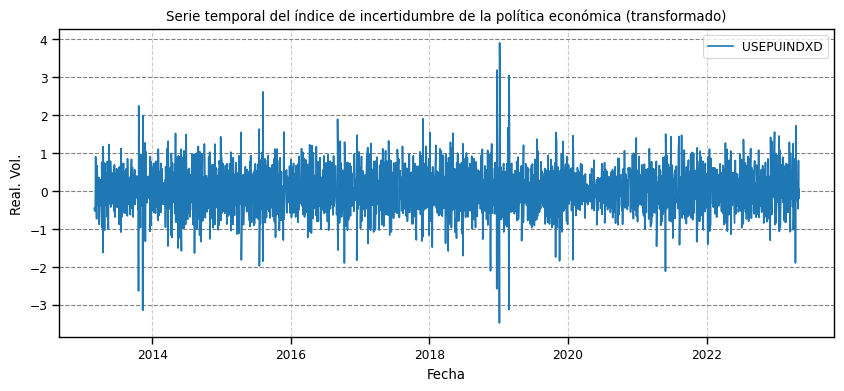

In [59]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(data=unc_dat, alpha = 1)
#ax.axvspan(date2num(datetime(2013,9,1)), date2num(datetime(2014,2,1)), color='lightgreen', alpha=0.5, zorder=0, label='Periodo pacífico')
#ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,1)), color='orange', alpha=0.5, zorder=0, label='Comienzo pandemia')
#plt.legend()
plt.title("Serie temporal del índice de incertidumbre de la política económica (transformado)")
plt.ylabel("Real. Vol.")
plt.grid(axis = "y", color = "0.5")
plt.xlabel("Fecha")

plt.show()

In [60]:
#Rolling correlation Volatilidad IIPE -  S&P500
corr_iipe = pd.merge(unc_dat, real_vol, how='inner', on='Time (EET)')
corr_iipe["shift S&P"] = corr_iipe["Close"].shift(-1)
corr_iipe = corr_iipe.drop(["Close"], axis=1)
corr_iipe.columns = ['IIPE', 'Vol. S&P500 shift']

display(corr_iipe.head())
print("Cantidad de datos: ", len(corr_iipe))

,IIPE,Vol. S&P500 shift
Time (EET),,
2013-03-04,0.272899,-4.946116
2013-03-05,-0.103841,-5.350190
2013-03-06,0.174988,-5.677612
2013-03-07,-0.541624,-5.135699
2013-03-08,-0.046278,-5.982608


Cantidad de datos:  2581


In [61]:
corriipe_1week = corr_iipe["IIPE"].rolling(5).corr(corr_iipe["Vol. S&P500 shift"]) 
corriipe_1week = corriipe_1week.dropna()

corriipe_3month = corr_iipe["IIPE"].rolling(60).corr(corr_iipe["Vol. S&P500 shift"]) 
corriipe_3month = corriipe_3month.dropna()

corriipe_6month = corr_iipe["IIPE"].rolling(120).corr(corr_iipe["Vol. S&P500 shift"]) 
corriipe_6month = corriipe_6month.dropna()

display(corriipe_1week.head())
print("Cantidad de datos: ", len(corriipe_1week))

Time (EET)
2013-03-08   -0.096110
2013-03-11   -0.716250
2013-03-12   -0.787166
2013-03-13   -0.786355
2013-03-14   -0.278344
dtype: float64

Cantidad de datos:  2576


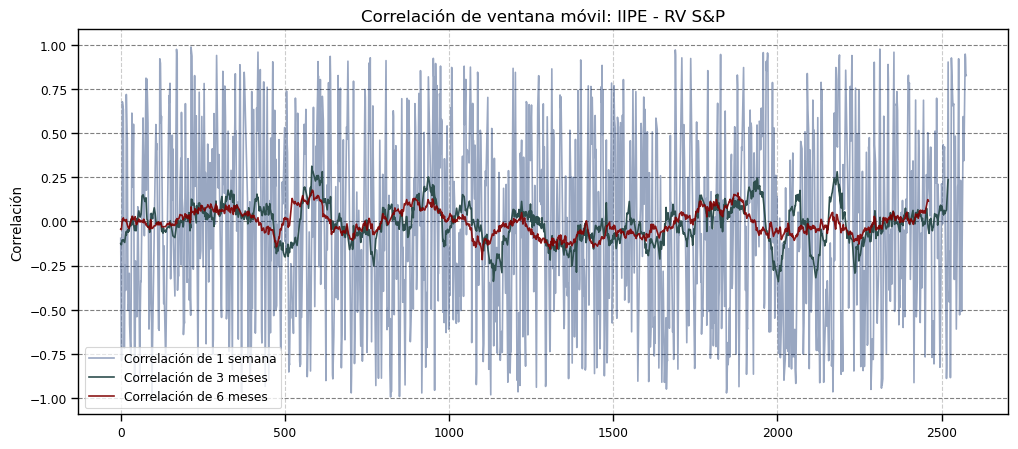

In [62]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


plt.plot(range(0,len(corriipe_1week)), corriipe_1week, alpha = 0.4, color = '#002366', label = "Correlación de 1 semana")

plt.plot(range(0,len(corriipe_3month)),corriipe_3month, alpha = 1, color = 'darkslategrey', label = "Correlación de 3 meses")

plt.plot(range(0,len(corriipe_6month)),corriipe_6month, alpha = 0.9, color = 'maroon', label = "Correlación de 6 meses")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Correlación de ventana móvil: IIPE - RV S&P", fontsize = 12)
plt.ylabel("Correlación")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

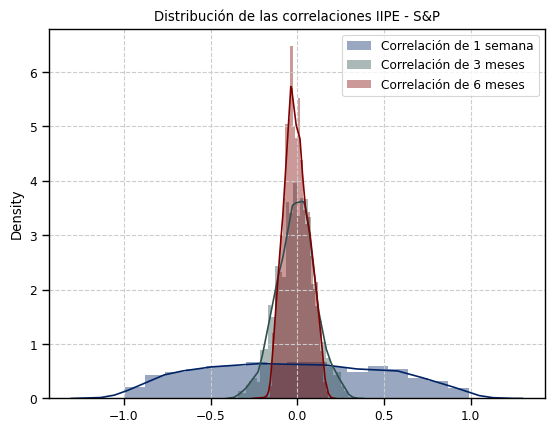

In [38]:
sns.set_context("paper")
sns.distplot(corriipe_1week, label = "Correlación de 1 semana", color = "#002366")
sns.distplot(corriipe_3month, kde=True, color = "darkslategrey", label = "Correlación de 3 meses")
sns.distplot(corriipe_6month, kde=True, label = "Correlación de 6 meses", color = "maroon",)

plt.title("Distribución de las correlaciones IIPE - S&P")
plt.legend()
plt.show()

In [39]:
print("Muestra de entrenamiento")
print("Media: ", np.mean(corriipe_1week))
print("Varianza: ", np.std(corriipe_1week, ddof = 1))
print("Skewness: ", skew(corriipe_1week))
print("#####################")
print("Muestra de validación")
print("Media: ", np.mean(corriipe_3month))
print("Varianza: ", np.std(corriipe_3month, ddof = 1))
print("Skewness: ", skew(corriipe_3month))
print("#####################")
print("Muestra de test")
print("Media: ", np.mean(corriipe_6month))
print("Varianza: ", np.std(corriipe_6month, ddof = 1))
print("Skewness: ", skew(corriipe_6month))

Muestra de entrenamiento
Media:  -0.0323762179787234
Varianza:  0.49565633515523866
Skewness:  0.06101415683748371
#####################
Muestra de validación
Media:  -0.009987904406956977
Varianza:  0.10928465321593209
Skewness:  -0.07849876075194258
#####################
Muestra de test
Media:  -0.006951959518675355
Varianza:  0.06861249188372297
Skewness:  0.21282758971908483


5-Year Breakeven Inflation Rate (daily)

Federal Reserve Bank of St. Louis, 5-Year Breakeven Inflation Rate [T5YIE], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/T5YIE, May 2, 2023.

In [16]:
bir_index = pd.read_csv(r"C:~TFG\Data\5-Year Breakeven Inflation Rate.csv", sep = ",")
bir_index["Time (EET)"] = pd.to_datetime(bir_index["DATE"], format='%Y.%m.%d %H:%M:%S.%f')
bir_index.set_index("Time (EET)", inplace=True)
bir_index = bir_index.loc['2013-03-01':]
bir_index = bir_index.drop(["DATE"], axis=1)
bir_index = bir_index[bir_index != "."]
bir_index = bir_index.astype(float)
bir_index = bir_index.dropna()

display(bir_index.head())
print("Cantidad de datos: ", len(bir_index))

,T5YIE
Time (EET),
2013-03-01,2.20
2013-03-04,2.22
2013-03-05,2.26
2013-03-06,2.27
2013-03-07,2.22


Cantidad de datos:  2545


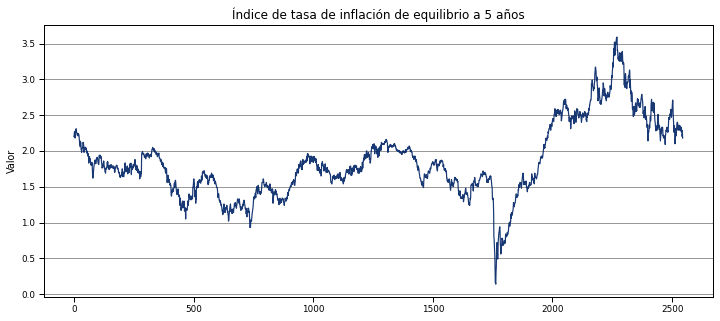

In [17]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


plt.plot(range(0,len(bir_index)), bir_index, alpha = 0.9, color = '#002366')

plt.ticklabel_format(useOffset=False) 
plt.title("Índice de tasa de inflación de equilibrio a 5 años", fontsize = 12)
plt.ylabel("Valor")
plt.xlabel("")
plt.grid(axis = "y", color = "0.5")
plt.show()

In [18]:
bir_dat = np.log(bir_index/bir_index.shift()).dropna()
#unc_dat = unc_dat[unc_dat != 0]
display(bir_dat.head())
print("Cantidad de días: ", len(bir_dat))

,T5YIE
Time (EET),
2013-03-04,0.009050
2013-03-05,0.017858
2013-03-06,0.004415
2013-03-07,-0.022273
2013-03-08,-0.018182


Cantidad de días:  2544


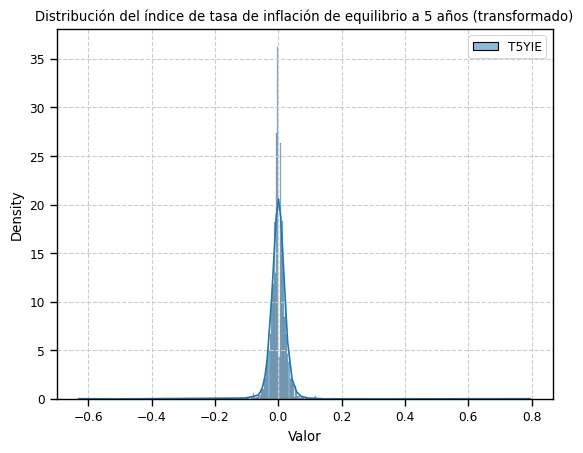

In [66]:
sns.set_context("paper")
sns.histplot(data=bir_dat, kde=True, stat='density')
plt.title("Distribución del índice de tasa de inflación de equilibrio a 5 años (transformado)")
#plt.grid(axis = "y", color = "0.5")
plt.xlabel("Valor")

plt.show()

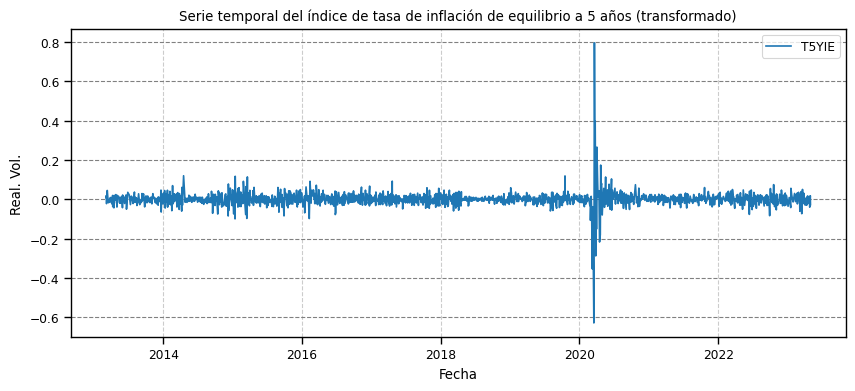

In [67]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(data=bir_dat, alpha = 1)
#ax.axvspan(date2num(datetime(2013,9,1)), date2num(datetime(2014,2,1)), color='lightgreen', alpha=0.5, zorder=0, label='Periodo pacífico')
#ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,1)), color='orange', alpha=0.5, zorder=0, label='Comienzo pandemia')
#plt.legend()
plt.title("Serie temporal del índice de tasa de inflación de equilibrio a 5 años (transformado)")
plt.ylabel("Real. Vol.")
plt.grid(axis = "y", color = "0.5")
plt.xlabel("Fecha")

plt.show()

In [68]:
#Rolling correlation Volatilidad TIEY5 -  S&P500
corr_bir = pd.merge(bir_dat, real_vol, how='inner', on='Time (EET)')
corr_bir["shift S&P"] = corr_bir["Close"].shift(-1)
corr_bir = corr_bir.drop(["Close"], axis=1)
corr_bir.columns = ['T5YIE', 'Vol. S&P500 shift']

display(corr_bir.head())
print("Cantidad de datos: ", len(corr_bir))

,T5YIE,Vol. S&P500 shift
Time (EET),,
2013-03-04,0.009050,-4.946116
2013-03-05,0.017858,-5.350190
2013-03-06,0.004415,-5.677612
2013-03-07,-0.022273,-5.135699
2013-03-08,-0.018182,-5.982608


Cantidad de datos:  2495


In [69]:
corrbir_1week = corr_bir["T5YIE"].rolling(5).corr(corr_bir["Vol. S&P500 shift"]) 
corrbir_1week = corrbir_1week.dropna()

corrbir_3month = corr_bir["T5YIE"].rolling(60).corr(corr_bir["Vol. S&P500 shift"]) 
corrbir_3month = corrbir_3month.dropna()

corrbir_6month = corr_bir["T5YIE"].rolling(120).corr(corr_bir["Vol. S&P500 shift"]) 
corrbir_6month = corrbir_6month.dropna()

display(corrbir_1week.head())
print("Cantidad de datos: ", len(corrbir_1week))

Time (EET)
2013-03-08    0.284550
2013-03-11    0.015366
2013-03-12   -0.043935
2013-03-13   -0.032751
2013-03-14    0.815672
dtype: float64

Cantidad de datos:  2490


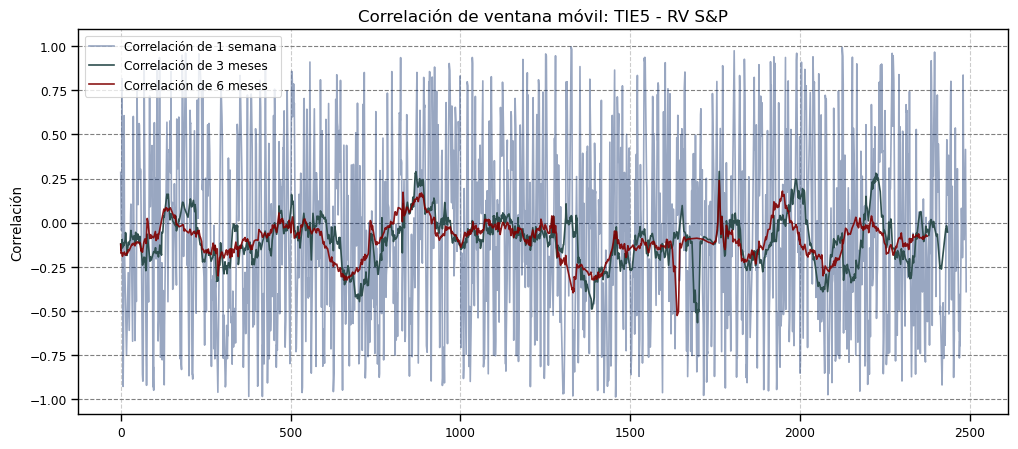

In [70]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


plt.plot(range(0,len(corrbir_1week)), corrbir_1week, alpha = 0.4, color = '#002366', label = "Correlación de 1 semana")

plt.plot(range(0,len(corrbir_3month)),corrbir_3month, alpha = 1, color = 'darkslategrey', label = "Correlación de 3 meses")

plt.plot(range(0,len(corrbir_6month)),corrbir_6month, alpha = 0.9, color = 'maroon', label = "Correlación de 6 meses")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Correlación de ventana móvil: TIE5 - RV S&P", fontsize = 12)
plt.ylabel("Correlación")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

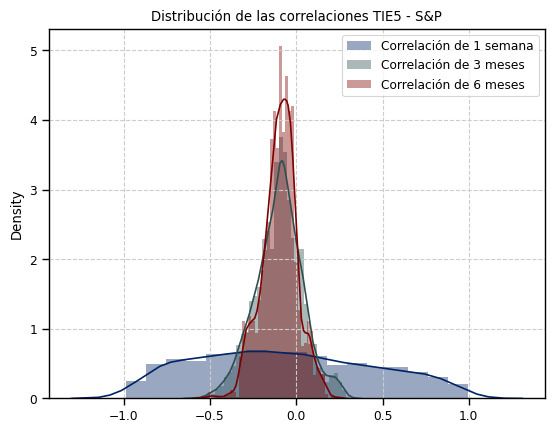

In [71]:
sns.set_context("paper")
sns.distplot(corrbir_1week, label = "Correlación de 1 semana", color = "#002366")
sns.distplot(corrbir_3month, kde=True, color = "darkslategrey", label = "Correlación de 3 meses")
sns.distplot(corrbir_6month, kde=True, label = "Correlación de 6 meses", color = "maroon",)

plt.title("Distribución de las correlaciones TIE5 - S&P")
plt.legend()
plt.show()

In [49]:
print("Muestra de entrenamiento")
print("Media: ", np.mean(corrbir_1week))
print("Varianza: ", np.std(corrbir_1week, ddof = 1))
print("Skewness: ", skew(corrbir_1week))
print("#####################")
print("Muestra de validación")
print("Media: ", np.mean(corrbir_3month))
print("Varianza: ", np.std(corrbir_3month, ddof = 1))
print("Skewness: ", skew(corrbir_3month))
print("#####################")
print("Muestra de test")
print("Media: ", np.mean(corrbir_6month))
print("Varianza: ", np.std(corrbir_6month, ddof = 1))
print("Skewness: ", skew(corrbir_6month))

Muestra de entrenamiento
Media:  -0.06270263926079979
Varianza:  0.5004459843216722
Skewness:  0.1713113617867016
#####################
Muestra de validación
Media:  -0.09984374256417963
Varianza:  0.13636620951445272
Skewness:  -0.07604422087471172
#####################
Muestra de test
Media:  -0.09761187360184685
Varianza:  0.10224944963743146
Skewness:  -0.23392519117947377


CBOE Volatility Index: VIX (daily)

Chicago Board Options Exchange, CBOE Volatility Index: VIX [VIXCLS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/VIXCLS, May 3, 2023.

In [19]:
vix_index = pd.read_csv(r"C:~TFG\Data\CBOE Volatility Index.csv", sep = ",")
vix_index["Time (EET)"] = pd.to_datetime(vix_index["DATE"], format='%Y.%m.%d %H:%M:%S.%f')
vix_index.set_index("Time (EET)", inplace=True)
vix_index = vix_index.loc['2013-03-01':]
vix_index = vix_index.drop(["DATE"], axis=1)
vix_index = vix_index[vix_index != "."]
vix_index = vix_index.astype(float)
vix_index = vix_index.dropna()

display(vix_index.head())
print("Cantidad de datos: ", len(vix_index))

,VIXCLS
Time (EET),
2013-03-01,15.36
2013-03-04,14.01
2013-03-05,13.48
2013-03-06,13.53
2013-03-07,13.06


Cantidad de datos:  2568


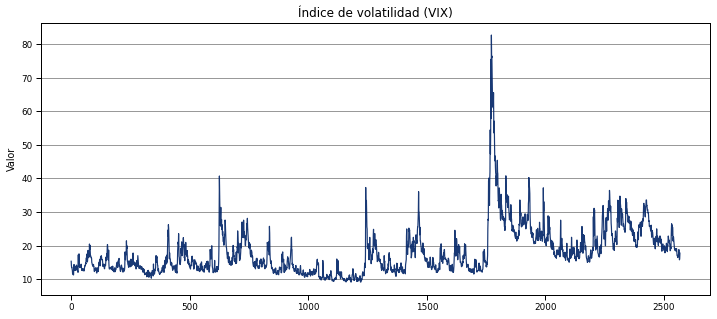

In [20]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


plt.plot(range(0,len(vix_index)), vix_index, alpha = 0.9, color = '#002366')

plt.ticklabel_format(useOffset=False) 
plt.title("Índice de volatilidad (VIX)", fontsize = 12)
plt.ylabel("Valor")
plt.xlabel("")
plt.grid(axis = "y", color = "0.5")
plt.show()

In [21]:
vix_dat = np.log(vix_index/vix_index.shift()).dropna()
#unc_dat = unc_dat[unc_dat != 0]
display(vix_dat.head())
print("Cantidad de días: ", len(vix_dat))

,VIXCLS
Time (EET),
2013-03-04,-0.091995
2013-03-05,-0.038564
2013-03-06,0.003702
2013-03-07,-0.035355
2013-03-08,-0.036651


Cantidad de días:  2567


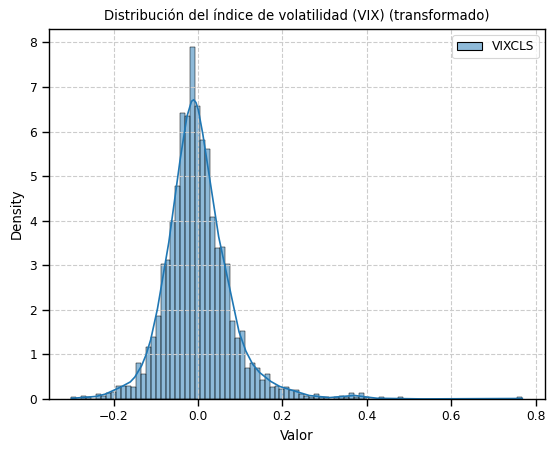

In [75]:
sns.set_context("paper")
sns.histplot(data=vix_dat, kde=True, stat='density')
plt.title("Distribución del índice de volatilidad (VIX) (transformado)")
#plt.grid(axis = "y", color = "0.5")
plt.xlabel("Valor")

plt.show()

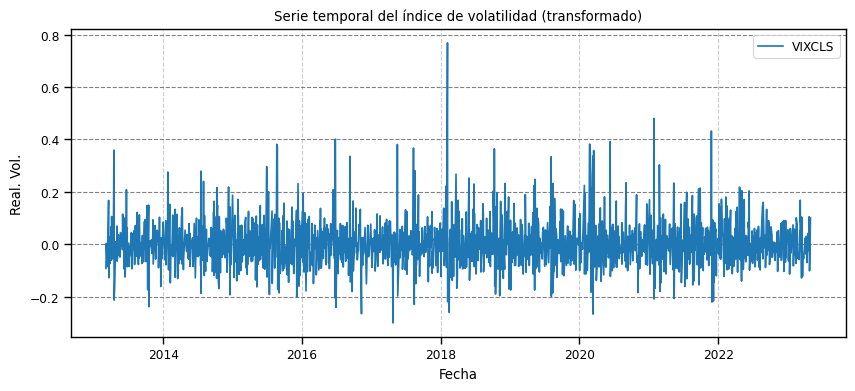

In [76]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(data=vix_dat, alpha = 1)
#ax.axvspan(date2num(datetime(2013,9,1)), date2num(datetime(2014,2,1)), color='lightgreen', alpha=0.5, zorder=0, label='Periodo pacífico')
#ax.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,1)), color='orange', alpha=0.5, zorder=0, label='Comienzo pandemia')
#plt.legend()
plt.title("Serie temporal del índice de volatilidad (transformado)")
plt.ylabel("Real. Vol.")
plt.grid(axis = "y", color = "0.5")
plt.xlabel("Fecha")

plt.show()

In [77]:
#Rolling correlation Volatilidad VIX -  S&P500
corr_vix = pd.merge(vix_dat, real_vol, how='inner', on='Time (EET)')
corr_vix["shift S&P"] = corr_vix["Close"].shift(-1)
corr_vix = corr_vix.drop(["Close"], axis=1)
corr_vix.columns = ['VIX', 'Vol. S&P500 shift']

display(corr_vix.head())
print("Cantidad de datos: ", len(corr_vix))

,VIX,Vol. S&P500 shift
Time (EET),,
2013-03-04,-0.091995,-4.946116
2013-03-05,-0.038564,-5.350190
2013-03-06,0.003702,-5.677612
2013-03-07,-0.035355,-5.135699
2013-03-08,-0.036651,-5.982608


Cantidad de datos:  2520


In [78]:
corrvix_1week = corr_vix["VIX"].rolling(5).corr(corr_vix["Vol. S&P500 shift"]) 
corrvix_1week = corrvix_1week.dropna()

corrvix_3month = corr_vix["VIX"].rolling(60).corr(corr_vix["Vol. S&P500 shift"]) 
corrvix_3month = corrvix_3month.dropna()

corrvix_6month = corr_vix["VIX"].rolling(120).corr(corr_vix["Vol. S&P500 shift"]) 
corrvix_6month = corrvix_6month.dropna()

display(corrvix_1week.head())
print("Cantidad de datos: ", len(corrvix_1week))

Time (EET)
2013-03-08   -0.640642
2013-03-11   -0.096727
2013-03-12   -0.274360
2013-03-13   -0.264332
2013-03-14   -0.388372
dtype: float64

Cantidad de datos:  2515


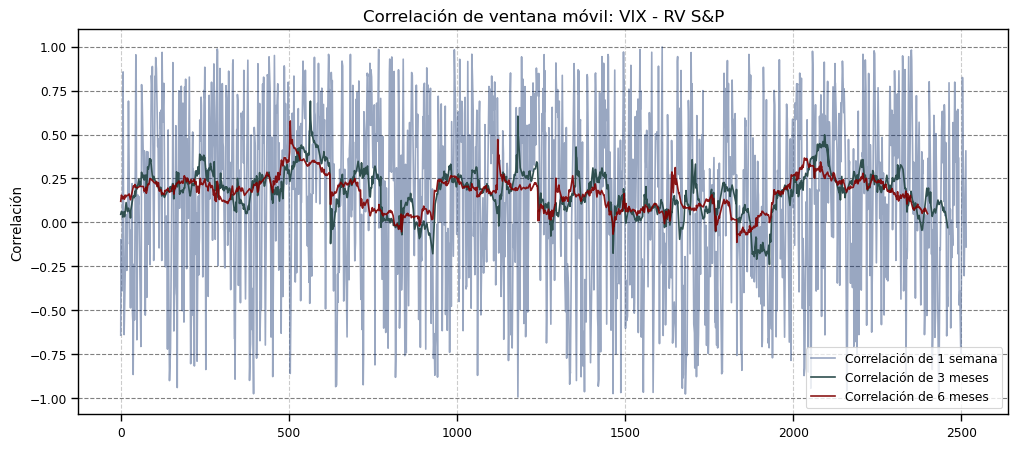

In [79]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


plt.plot(range(0,len(corrvix_1week)), corrvix_1week, alpha = 0.4, color = '#002366', label = "Correlación de 1 semana")

plt.plot(range(0,len(corrvix_3month)),corrvix_3month, alpha = 1, color = 'darkslategrey', label = "Correlación de 3 meses")

plt.plot(range(0,len(corrvix_6month)),corrvix_6month, alpha = 0.9, color = 'maroon', label = "Correlación de 6 meses")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Correlación de ventana móvil: VIX - RV S&P", fontsize = 12)
plt.ylabel("Correlación")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

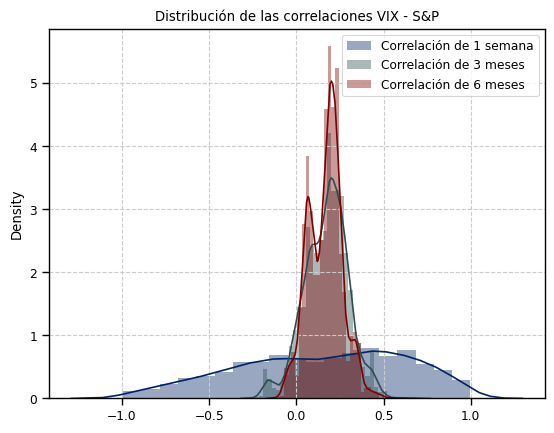

In [80]:
sns.set_context("paper")
sns.distplot(corrvix_1week, label = "Correlación de 1 semana", color = "#002366")
sns.distplot(corrvix_3month, kde=True, color = "darkslategrey", label = "Correlación de 3 meses")
sns.distplot(corrvix_6month, kde=True, label = "Correlación de 6 meses", color = "maroon",)

plt.title("Distribución de las correlaciones VIX - S&P")
plt.legend()
plt.show()

In [59]:
print("Muestra de entrenamiento")
print("Media: ", np.mean(corrvix_1week))
print("Varianza: ", np.std(corrvix_1week, ddof = 1))
print("Skewness: ", skew(corrvix_1week))
print("#####################")
print("Muestra de validación")
print("Media: ", np.mean(corrvix_3month))
print("Varianza: ", np.std(corrvix_3month, ddof = 1))
print("Skewness: ", skew(corrvix_3month))
print("#####################")
print("Muestra de test")
print("Media: ", np.mean(corrvix_6month))
print("Varianza: ", np.std(corrvix_6month, ddof = 1))
print("Skewness: ", skew(corrvix_6month))

Muestra de entrenamiento
Media:  0.14032281932903706
Varianza:  0.4759063921149276
Skewness:  -0.2724701679424658
#####################
Muestra de validación
Media:  0.1725994612357786
Varianza:  0.12573534988002835
Skewness:  -0.1904594713006037
#####################
Muestra de test
Media:  0.16604061133859274
Varianza:  0.0962040678333045
Skewness:  0.04136682827532025


---

# MERGE DE TODAS LAS VARIABLES

In [22]:
df_total = pd.merge(unc_dat, real_vol, how='inner', on='Time (EET)')
df_total = pd.merge(df_total, bir_dat, how='inner', on='Time (EET)')
df_total = pd.merge(df_total, vix_dat, how='inner', on='Time (EET)')
df_total = pd.merge(df_total, real_vol_Oil, how='inner', on='Time (EET)')
df_total = pd.merge(df_total, real_vol_Gold, how='inner', on='Time (EET)')

df_total.columns = ['EPUI', 'Real Vol. S&P', 'TIE5', 'VIX', 'Real Vol. Oil', 'Real Vol. Gold']

#df_total['Monday'] = (df_total.index.get_level_values(0).weekday == 0).astype(int)
#df_total['Después Lunes'] = df_total["Monday"].shift(-1)

#df_total = df_total.drop(["Monday"], axis=1)
df_total = df_total.dropna()

display(df_total.head(10))
#display(Y_total.head(10))
print("Cantidad de datos: ", len(df_total))

,EPUI,Real Vol. S&P,TIE5,VIX,Real Vol. Oil,Real Vol. Gold
Time (EET),,,,,,
2013-03-04,0.272899,-5.206986,0.009050,-0.091995,-4.825482,-5.476839
2013-03-05,-0.103841,-4.946116,0.017858,-0.038564,-4.666629,-5.018270
2013-03-06,0.174988,-5.350190,0.004415,0.003702,-4.873045,-5.135274
2013-03-07,-0.541624,-5.677612,-0.022273,-0.035355,-5.044444,-5.415768
2013-03-08,-0.046278,-5.135699,-0.018182,-0.036651,-4.818639,-4.589105
2013-03-12,-0.051083,-5.570500,-0.004396,0.059606,-4.926309,-4.567653
2013-03-13,0.089658,-5.779967,0.008772,-0.036519,-4.837910,-5.511092
2013-03-14,-0.743282,-5.594536,0.008696,-0.045836,-4.705398,-5.527149
2013-03-15,0.584067,-5.615275,-0.004338,0.000000,-4.718577,-5.464466


Cantidad de datos:  2464


In [23]:
from sklearn.preprocessing import MinMaxScaler

dim = df_total.shape
data = df_total

#X_train = df_total.iloc[0:int(dim[0]*0.7)]
#X_val = df_total.iloc[int(dim[0]*0.7):int(dim[0]*0.85)]
X_train_val = df_total.iloc[0:int(dim[0]*0.85)]
#X_test = df_total.iloc[int(dim[0]*0.85):] #Reservar muestra desconocida

scaler = MinMaxScaler()
scaler.fit(X_train_val)

X_data = scaler.transform(data)

Y_data = X_data[: , 1]

X_data = X_data[:-1, :]
Y_data = Y_data[1:]

dim = X_data.shape

X_train = X_data[0:int(dim[0]*0.7), :]
Y_train = Y_data[0:int(dim[0]*0.7)]

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [94]:
# split a multivariate sequence into samples
def create_dataset(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
    X.append(seq_x)
    y.append(seq_y)
    return array(X), array(y)

In [95]:
X_prueba = keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    None,
    sequence_length=20)
Y_prueba = Y_train[19:] #1 menos
dataset = keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    Y_prueba,
    sequence_length=20)

for batch in dataset:
    inputs, targets = batch
    print(inputs[0])
    print(len(inputs))
    assert np.array_equal(inputs[0], X_train[:20,:])
    print(targets[0])
    print(Y_prueba[0])# First sequence: steps [0-9]
    assert np.array_equal(targets[0], Y_prueba[0])  # Corresponding target: step 10
    break


tf.Tensor(
[[0.55352605 0.4091575  0.44793905 0.19458897 0.45268233 0.25563745]
 [0.49257272 0.46340955 0.45412629 0.24461453 0.47630091 0.38494713]
 [0.53768495 0.37937592 0.4446832  0.28418717 0.44561053 0.35195375]
 [0.42174287 0.31128344 0.4259358  0.24761894 0.42012642 0.27285865]
 [0.50188585 0.42398277 0.42880914 0.24640558 0.45369967 0.50596555]
 [0.5011085  0.33355913 0.43849396 0.33652805 0.43769105 0.51201457]
 [0.52387924 0.2899972  0.44774387 0.24652982 0.45083437 0.24597861]
 [0.38911641 0.32856046 0.44769028 0.23780631 0.47053664 0.2414508 ]
 [0.60387055 0.32424747 0.43853415 0.28072081 0.46857722 0.2591265 ]
 [0.4690748  0.43830491 0.42925733 0.43750966 0.47549034 0.49818153]
 [0.52880953 0.47712091 0.43846657 0.3502555  0.51759238 0.29199614]
 [0.52612084 0.46247265 0.44158177 0.16153781 0.47950653 0.2612595 ]
 [0.52162329 0.49076777 0.43215243 0.37350987 0.46087238 0.35115082]
 [0.44632604 0.44722864 0.44473896 0.25218229 0.45054832 0.27526223]
 [0.56568719 0.49052514

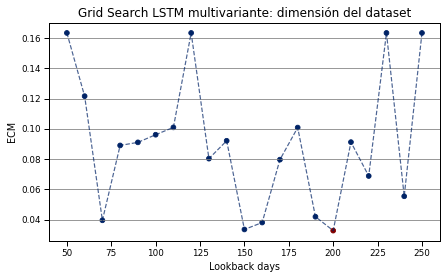

La configuración óptima es:  [200]


In [61]:
past_size = range(50, 260, 10)


n = X_train.shape[0]
score_grid = []
cvset = [0.5, 0.85]

'''
for val in past_size : 
    score = 0
    print(val)
    for cv in cvset : 
      #  tf.keras.utils.set_random_seed(123)
        
       # tf.random.set_seed(123)  
        #np.random.seed(123)
        
     #   Xt_train = keras.preprocessing.timeseries_dataset_from_array(
      #              X_train[0:int(n*(cv)) , : ],
       #             None,
        #            sequence_length=val)
        Yt_train = Y_train[val-1:int(n*(cv))-1]
        
        dataset_train = keras.preprocessing.timeseries_dataset_from_array(
                            X_train[0:int(n*(cv)) , : ],
                            Yt_train,
                            batch_size = X_train[0:int(n*(cv)) , : ].shape[0],
                            sequence_length=val)
        
      #  Xt_val = keras.preprocessing.timeseries_dataset_from_array(
      #              X_train[int(n*(cv)) - val:int(n*(cv + 0.15)) , : ],
      #              None,
      #              sequence_length=val)
        Yt_val = Y_train[int(n*(cv))-1:int(n*(cv + 0.15))-1]
      #  print(len(Yt_val))
        
        dataset_val = keras.preprocessing.timeseries_dataset_from_array(
                            X_train[int(n*(cv)) - val:int(n*(cv + 0.15)) , : ],
                            Yt_val,
                            batch_size = X_train[int(n*(cv)) - val:int(n*(cv + 0.15)) , : ].shape[0],
                            sequence_length=val)
        
        for batch in dataset_train.take(1):
            inputs, targets = batch
        
        print(inputs.numpy().shape)
       # print(len(Yt_train))

        mod_temp = Sequential()
        mod_temp.add(LSTM(128,activation="tanh", input_shape=(inputs.shape[1], inputs.shape[2])))
        mod_temp.add(Dense(1, activation = "relu"))

        mod_temp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=tf.keras.metrics.MeanSquaredError())

        mod_temp.fit(
                dataset_train,
                epochs = 10,
                validation_data=dataset_val,
                batch_size=16,
                verbose = 0)
        score_temp = mod_temp.evaluate(dataset_val,batch_size=16, verbose = 0)
        score += float(score_temp[0])
    score_grid.append(round(score/len(cvset),6))
'''

#Para fácil reproducción de resultados
score_grid = [0.163331,
 0.121589,
 0.039608,
 0.089056,
 0.091079,
 0.096131,
 0.100963,
 0.163331,
 0.080329,
 0.09213,
 0.033568,
 0.038135,
 0.079664,
 0.100849,
 0.041975,
 0.032801,
 0.091233,
 0.068875,
 0.163331,
 0.055472,
 0.163331]


zmin = np.min(score_grid)
mask = np.array(score_grid) == zmin
color = np.where(mask, 'maroon', '#002366')

sns.set_context("paper")
fig, ax = plt.subplots(figsize = (7,4))
plt.scatter(x = past_size, y = score_grid, color=color, alpha = 1)
plt.plot(past_size, score_grid, alpha = 0.7, color = '#002366', linestyle = "--")
plt.ticklabel_format(useOffset=False) 

plt.title("Grid Search LSTM multivariante: dimensión del dataset", fontsize = 12)
plt.ylabel("ECM")
plt.xlabel("Lookback days")
plt.grid(axis = "y", color = "0.5")
plt.show()
print("La configuración óptima es: ", np.array(past_size)[np.array(score_grid) == zmin])

In [24]:
#Configuracion de datasets

time_size = 200
ntest = int(X_data.shape[0]*0.15)

Y_train = Y_data[time_size-1:-2*ntest-1]
X_train = X_data[:-2*ntest, :]
train = keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    Y_train,
    sequence_length=time_size,
    batch_size = X_train.shape[0])

Y_val = Y_data[-1-2*ntest:-1-ntest]
X_val = X_data[-time_size-2*ntest:-ntest, :]
val = keras.preprocessing.timeseries_dataset_from_array(
    X_val,
    Y_val,
    sequence_length=time_size,
    batch_size = X_val.shape[0])

Y_test = Y_data[-1-ntest:-1]
X_test = X_data[-time_size-ntest:, :]
test = keras.preprocessing.timeseries_dataset_from_array(
    X_test,
    Y_test,
    sequence_length=time_size,
    batch_size = X_test.shape[0])

for batch in train.take(1):
            inputs, targets = batch
        
size_1 = inputs.shape[1]
size_2 = inputs.shape[2]

In [23]:
# Tuneado por hyperband

import kerastuner as kt

#tf.keras.utils.set_random_seed(144)
#tf.random.set_seed(12)  
#np.random.seed(12)

def build_model(hp):
    hidden_act = hp.Choice('hidden', values=["relu","swish","sigmoid", "tanh", "elu", "linear"])
    output_act = hp.Choice('output', values=["relu", "swish","elu", "linear"])

    units = hp.Int('units', min_value=16, max_value=512, step=16)
    droprate = hp.Int('droprate', min_value=5, max_value=20, step=5)
    recur_drop = hp.Int('recur_drop', min_value=5, max_value=20, step=5)

    drop_fl = droprate/100
    recur_fl = recur_drop/100

    mod_temp = Sequential()
    mod_temp.add(LSTM(units, dropout=drop_fl, recurrent_dropout=recur_fl ,activation=hidden_act, input_shape=(size_1, size_2)))
    mod_temp.add(Dense(1, activation = output_act))

    hp_learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    mod_temp.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss=tf.keras.losses.MeanSquaredError(),
      metrics=tf.keras.metrics.MeanSquaredError())

    return mod_temp

# HyperBand algorithm from keras tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=30,
    directory=r'C:~TFG\keras_tuner_LSTM_multi',
    project_name='keras_tuner_multi_LSTM',
    seed = 1)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search_space_summary(extended=True)
tuner.search(train, epochs=50, validation_data=val, callbacks=[stop_early])

models = tuner.get_best_models(num_models=1)
first_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
first_model.build()
first_model.summary(expand_nested=True,
    show_trainable=True)


Trial 86 Complete [00h 08m 16s]
val_loss: 0.013184329494833946

Best val_loss So Far: 0.010995973832905293
Total elapsed time: 01h 07m 15s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 lstm (LSTM)                 (None, 80)                27840     Y          
                                                                            
 dense (Dense)               (None, 1)                 81        Y          
                                                                            
Total params: 27,921
Trainable params: 27,921
Non-trainable params: 0
____________________________________________________________________________


In [24]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'hidden': 'tanh', 'output': 'swish', 'units': 80, 'droprate': 15, 'recur_drop': 5, 'lr': 0.005218086982564764, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0053'}


In [25]:
first_model.save(r'C:~TFG\Modelos\LSTM_model_multi.h5')

In [25]:
modelo_vol = keras.models.load_model(r'C:~TFG\Modelos\LSTM_model_multi.h5')

In [35]:
path_checkpoint = r'C:~TFG\Modelos\LSTM_model_multi_trained.h5'
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=15,
    restore_best_weights=True)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)

tf.keras.utils.set_random_seed(144)
tf.random.set_seed(12)  
np.random.seed(12)

history = modelo_vol.fit(
    train,
    epochs=30,
    validation_data= val,
    callbacks=[modelckpt_callback, es_callback])

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 1: val_loss improved from inf to 0.01066, saving model to C:\Users\super\OneDrive\Documentos\UC3M\TFG\Modelos\LSTM_model_multi_trained.h5
12/12 [==============================] - 7s 529ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 2: val_loss did not improve from 0.01066
12/12 [==============================] - 6s 499ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 3: val_loss did not improve from 0.01066
12/12 [==============================] - 6s 502ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0204 - val_mean_squared_error: 0.02

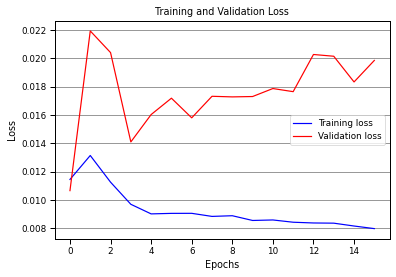

In [36]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    sns.set_context("paper")
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.ticklabel_format(useOffset=False) 
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(axis = "y", color = "0.5")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [26]:
score = modelo_vol.evaluate(test)
print("El MSE cometido en la muestra de test es: " + str(score[0]))

1/1 [==============================] - 1s 853ms/step - loss: 0.0077 - mean_squared_error: 0.0077
El MSE cometido en la muestra de test es: 0.007744485978037119


In [27]:
from sklearn.metrics import r2_score

y_pred = modelo_vol.predict(test, batch_size=1)
print("El pseudo R2 obtenido es: "+ str(round(r2_score(Y_test, y_pred),4)))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
print('Test RMSE: %.6f' % mse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, y_pred)
print('Test MAE: %.6f' % mae)

1/1 [==============================] - 0s 281ms/step
El pseudo R2 obtenido es: 0.3024
Test RMSE: 0.007744
Test MAE: 0.068817


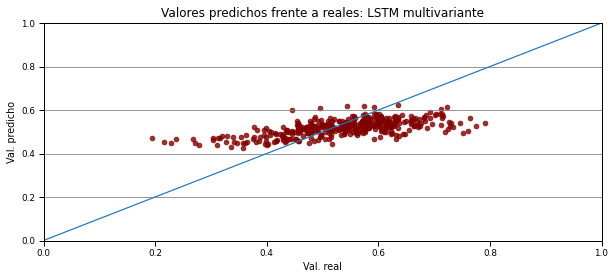

In [28]:
y_actual = Y_test.reshape(Y_test.shape[0],1)
y_pred2 = y_pred.reshape(Y_test.shape[0],1)

data_pred = np.column_stack([y_actual,y_pred2])
data_pred = pd.DataFrame(data_pred, columns = ("true value", "pred value"))

sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))

plt.scatter(data_pred["true value"],data_pred["pred value"], c= "maroon", alpha=0.8)

plt.axline([0, 0], slope=1)
plt.xlim(0, 1) 
plt.ylim(0, 1) 
plt.title("Valores predichos frente a reales: LSTM multivariante", fontsize = 12)
plt.xlabel("Val. real")
plt.ylabel("Val. predicho")
plt.grid(axis = "y", color = "0.5")
plt.show()

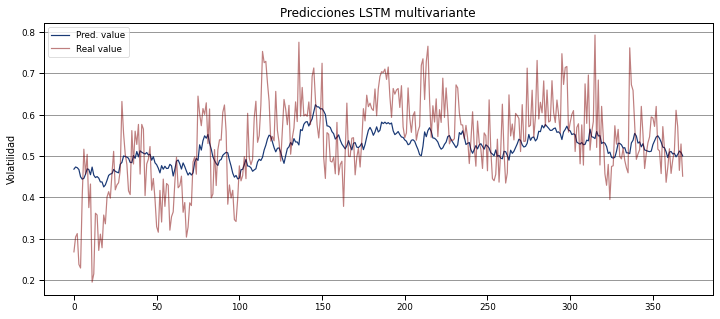

In [29]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


#plt.scatter(x = range(0,len(predictions)), y = predictions, color='#002366', alpha = 1)
plt.plot(range(0,len(data_pred["pred value"])), data_pred["pred value"], alpha = 0.9, color = '#002366', label = "Pred. value")

#plt.scatter(x = range(0,len(predictions)), y = test, color='maroon', alpha = 1)
plt.plot(range(0,len(data_pred["pred value"])), data_pred["true value"], alpha = 0.5, color = 'maroon', label = "Real value")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Predicciones LSTM multivariante", fontsize = 12)
plt.ylabel("Volatilidad")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

---

# MODELO GRU

In [30]:
from tensorflow.keras.layers import GRU

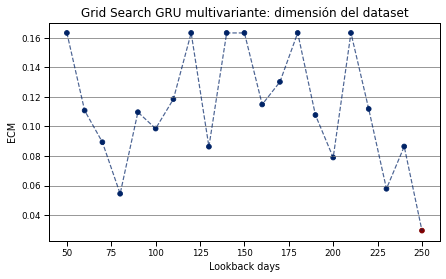

La configuración óptima es:  [250]


In [31]:
past_size = range(50, 260, 10)


n = X_train.shape[0]
score_grid = []
cvset = [0.5, 0.85]

'''
for val in past_size : 
    score = 0
    print(val)
    for cv in cvset : 
      #  tf.keras.utils.set_random_seed(123)
        
       # tf.random.set_seed(123)  
        #np.random.seed(123)
        
     #   Xt_train = keras.preprocessing.timeseries_dataset_from_array(
      #              X_train[0:int(n*(cv)) , : ],
       #             None,
        #            sequence_length=val)
        Yt_train = Y_train[val-1:int(n*(cv))-1]
        
        dataset_train = keras.preprocessing.timeseries_dataset_from_array(
                            X_train[0:int(n*(cv)) , : ],
                            Yt_train,
                            batch_size = X_train[0:int(n*(cv)) , : ].shape[0],
                            sequence_length=val)
        
      #  Xt_val = keras.preprocessing.timeseries_dataset_from_array(
      #              X_train[int(n*(cv)) - val:int(n*(cv + 0.15)) , : ],
      #              None,
      #              sequence_length=val)
        Yt_val = Y_train[int(n*(cv))-1:int(n*(cv + 0.15))-1]
      #  print(len(Yt_val))
        
        dataset_val = keras.preprocessing.timeseries_dataset_from_array(
                            X_train[int(n*(cv)) - val:int(n*(cv + 0.15)) , : ],
                            Yt_val,
                            batch_size = X_train[int(n*(cv)) - val:int(n*(cv + 0.15)) , : ].shape[0],
                            sequence_length=val)
        
        for batch in dataset_train.take(1):
            inputs, targets = batch
        
        print(inputs.numpy().shape)
       # print(len(Yt_train))

        mod_temp = Sequential()
        mod_temp.add(GRU(128,activation="tanh", input_shape=(inputs.shape[1], inputs.shape[2])))
        mod_temp.add(Dense(1, activation = "relu"))

        mod_temp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=tf.keras.metrics.MeanSquaredError())

        mod_temp.fit(
                dataset_train,
                epochs = 10,
                validation_data=dataset_val,
                batch_size=16,
                verbose = 0)
        score_temp = mod_temp.evaluate(dataset_val,batch_size=16, verbose = 0)
        score += float(score_temp[0])
    score_grid.append(round(score/len(cvset),6))
'''

#Para fácil reproducción de resultados
score_grid = [0.163331,
 0.110777,
 0.089325,
 0.054425,
 0.10967,
 0.098558,
 0.118526,
 0.163331,
 0.086292,
 0.163331,
 0.163331,
 0.114871,
 0.130187,
 0.163331,
 0.107723,
 0.078946,
 0.163331,
 0.111878,
 0.057782,
 0.086433,
 0.029446]


zmin = np.min(score_grid)
mask = np.array(score_grid) == zmin
color = np.where(mask, 'maroon', '#002366')

sns.set_context("paper")
fig, ax = plt.subplots(figsize = (7,4))
plt.scatter(x = past_size, y = score_grid, color=color, alpha = 1)
plt.plot(past_size, score_grid, alpha = 0.7, color = '#002366', linestyle = "--")
plt.ticklabel_format(useOffset=False) 

plt.title("Grid Search GRU multivariante: dimensión del dataset", fontsize = 12)
plt.ylabel("ECM")
plt.xlabel("Lookback days")
plt.grid(axis = "y", color = "0.5")
plt.show()
print("La configuración óptima es: ", np.array(past_size)[np.array(score_grid) == zmin])

In [31]:
#Configuracion de datasets

time_size = 250
ntest = int(X_data.shape[0]*0.15)

Y_train = Y_data[time_size-1:-2*ntest-1]
X_train = X_data[:-2*ntest, :]
train = keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    Y_train,
    sequence_length=time_size)

Y_val = Y_data[-1-2*ntest:-1-ntest]
X_val = X_data[-time_size-2*ntest:-ntest, :]
val = keras.preprocessing.timeseries_dataset_from_array(
    X_val,
    Y_val,
    sequence_length=time_size)

Y_test = Y_data[-1-ntest:-1]
X_test = X_data[-time_size-ntest:, :]
test = keras.preprocessing.timeseries_dataset_from_array(
    X_test,
    Y_test,
    sequence_length=time_size)

for batch in train.take(1):
            inputs, targets = batch
        
size_1 = inputs.shape[1]
size_2 = inputs.shape[2]

In [72]:
import kerastuner as kt

tf.keras.utils.set_random_seed(125)
tf.random.set_seed(3)  
np.random.seed(3)

def build_model(hp):
    hidden_act = hp.Choice('hidden', values=["relu","swish","sigmoid", "tanh", "elu", "linear"])
    output_act = hp.Choice('output', values=["relu", "swish","elu", "linear"])

    units = hp.Int('units', min_value=16, max_value=512, step=16)
    droprate = hp.Int('droprate', min_value=5, max_value=20, step=5)
    recur_drop = hp.Int('recur_drop', min_value=5, max_value=20, step=5)

    drop_fl = droprate/100
    recur_fl = recur_drop/100

    mod_temp = Sequential()
    mod_temp.add(GRU(units, dropout=drop_fl, recurrent_dropout=recur_fl ,activation=hidden_act, input_shape=(size_1, size_2)))
    mod_temp.add(Dense(1, activation = output_act))

    hp_learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")

    mod_temp.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss=tf.keras.losses.MeanSquaredError(),
      metrics=tf.keras.metrics.MeanSquaredError())

    return mod_temp

# HyperBand algorithm from keras tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=30,
    directory=r'C:~UC3M\TFG\keras_tuner_GRU_multi',
    project_name='keras_tuner_multi_GRU',
    seed = 1)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search_space_summary(extended=True)
tuner.search(train, epochs=50, validation_data=val, callbacks=[stop_early])

models = tuner.get_best_models(num_models=1)
first_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
first_model.build()
first_model.summary(expand_nested=True,
    show_trainable=True)

Trial 88 Complete [00h 06m 35s]
val_loss: 0.013054918497800827

Best val_loss So Far: 0.007100195623934269
Total elapsed time: 02h 48m 29s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 gru (GRU)                   (None, 224)               155904    Y          
                                                                            
 dense (Dense)               (None, 1)                 225       Y          
                                                                            
Total params: 156,129
Trainable params: 156,129
Non-trainable params: 0
____________________________________________________________________________


In [73]:
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

{'hidden': 'tanh', 'output': 'relu', 'units': 224, 'droprate': 5, 'recur_drop': 10, 'lr': 0.0024961712096001933, 'tuner/epochs': 30, 'tuner/initial_epoch': 10, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0075'}


In [74]:
first_model.save(r'C:~TFG\Modelos\GRU_model_multi.h5')

In [32]:
modelo_vol = keras.models.load_model(r'C:~TFG\Modelos\GRU_model_multi.h5')

In [55]:
path_checkpoint = r'C:~TFG\Modelos\GRU_model_multi_trained.h5'
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10,
    restore_best_weights=True)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)

tf.keras.utils.set_random_seed(10)
tf.random.set_seed(2)  
np.random.seed(2)

history = modelo_vol.fit(
    train,
    epochs=50,
    validation_data= val,
    callbacks=[modelckpt_callback, es_callback])

Epoch 1/50
12/12 [==============================] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 1: val_loss improved from inf to 0.00972, saving model to C:\Users\super\OneDrive\Documentos\UC3M\TFG\Modelos\GRU_model_multi_trained.h5
12/12 [==============================] - 21s 2s/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 2/50
12/12 [==============================] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 2: val_loss did not improve from 0.00972
12/12 [==============================] - 19s 2s/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 3/50
12/12 [==============================] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 3: val_loss did not improve from 0.00972
12/12 [==============================] - 20s 2s/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoc

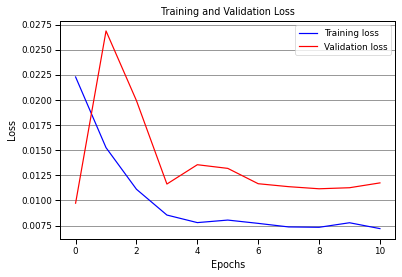

In [56]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    sns.set_context("paper")
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.ticklabel_format(useOffset=False) 
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(axis = "y", color = "0.5")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [76]:
score = modelo_vol.evaluate(test)
print("El MSE cometido en la muestra de test es: " + str(score[0]))

3/3 [==============================] - 2s 486ms/step - loss: 0.0047 - mean_squared_error: 0.0047
El MSE cometido en la muestra de test es: 0.004725032951682806


In [33]:
from sklearn.metrics import r2_score

y_pred = modelo_vol.predict(test, batch_size=1)
print("El pseudo R2 obtenido es: "+ str(round(r2_score(Y_test, y_pred),4)))

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
print('Test RMSE: %.6f' % mse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, y_pred)
print('Test MAE: %.6f' % mae)

3/3 [==============================] - 1s 101ms/step
El pseudo R2 obtenido es: 0.5744
Test RMSE: 0.004725
Test MAE: 0.054949


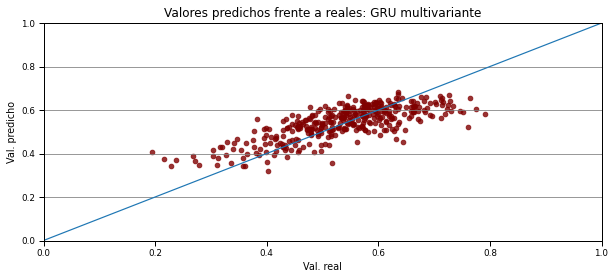

In [34]:
y_actual = Y_test.reshape(Y_test.shape[0],1)
y_pred2 = y_pred.reshape(Y_test.shape[0],1)

data_pred = np.column_stack([y_actual,y_pred2])
data_pred = pd.DataFrame(data_pred, columns = ("true value", "pred value"))

sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))

plt.scatter(data_pred["true value"],data_pred["pred value"], c= "maroon", alpha=0.8)

plt.axline([0, 0], slope=1)
plt.xlim(0, 1) 
plt.ylim(0, 1) 
plt.title("Valores predichos frente a reales: GRU multivariante", fontsize = 12)
plt.xlabel("Val. real")
plt.ylabel("Val. predicho")
plt.grid(axis = "y", color = "0.5")
plt.show()

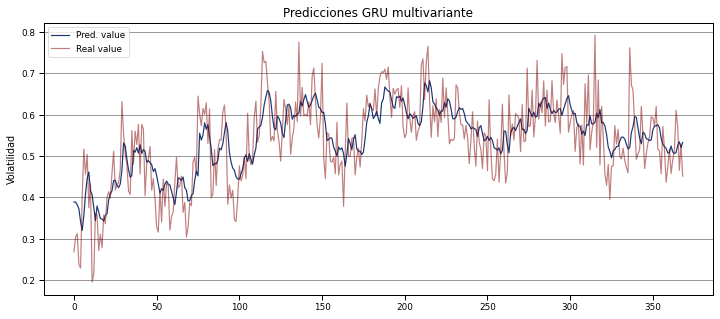

In [35]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


#plt.scatter(x = range(0,len(predictions)), y = predictions, color='#002366', alpha = 1)
plt.plot(range(0,len(data_pred["pred value"])), data_pred["pred value"], alpha = 0.9, color = '#002366', label = "Pred. value")

#plt.scatter(x = range(0,len(predictions)), y = test, color='maroon', alpha = 1)
plt.plot(range(0,len(data_pred["pred value"])), data_pred["true value"], alpha = 0.5, color = 'maroon', label = "Real value")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Predicciones GRU multivariante", fontsize = 12)
plt.ylabel("Volatilidad")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

---

# MODELO ARMA

In [24]:
Arma_constant_data = np.delete(X_data, 1, 1) 
#Arma_constant_data = np.delete(Arma_constant_data, 0, 1) 


dim = X_data.shape

cons_train = Arma_constant_data[0:int(dim[0]*0.85), :]
train = Y_data[0:int(dim[0]*0.85)]

cons_test = Arma_constant_data[int(dim[0]*0.85):, :]
test = Y_data[int(dim[0]*0.85):]

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

print("AIC: ARMA Models")
ar = range(0,6,1)
i_val = [0,1]
ma = range(0,6,1)

config_ar = []
config_ma = []
aic_res = []

for x in ar : 
        for z in ma : 
            arima_tune = ARIMA(train, exog=cons_train, order=(x, 0, z)).fit()

            config_ar.append(x)
            config_ma.append(z)
            aic_res.append(arima_tune.aic)

zmin = np.min(aic_res)
mask = np.array(aic_res) == zmin
color = np.where(mask, 'maroon', '#002366')

AIC: ARMA Models


KeyboardInterrupt: 

In [26]:
from statsmodels.tsa.arima.model import ARIMA

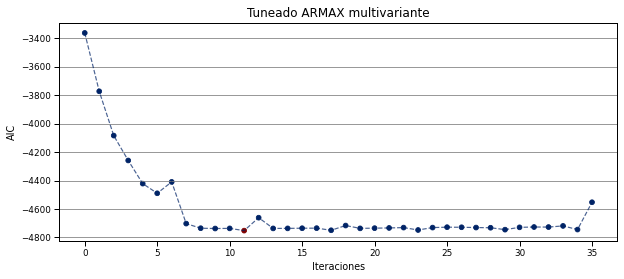

La configuración óptima es:  AR [1] MA [5]


In [28]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))
plt.scatter(x = range(0,len(aic_res)), y = aic_res, color=color, alpha = 1)
plt.plot(range(0,len(aic_res)), aic_res, alpha = 0.7, color = '#002366', linestyle = "--")
plt.ticklabel_format(useOffset=False) 

plt.title("Tuneado ARMAX multivariante", fontsize = 12)
plt.ylabel("AIC")
plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()
print("La configuración óptima es: ", 'AR' , np.array(config_ar)[np.array(aic_res) == zmin], 
      'MA',
      np.array(config_ma)[np.array(aic_res) == zmin])

In [27]:
arma_model = ARIMA(train, exog=cons_train, order=(1, 0, 5)).fit()

print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2093
Model:                 ARIMA(1, 0, 5)   Log Likelihood                2388.859
Date:                Fri, 19 May 2023   AIC                          -4751.718
Time:                        01:16:24   BIC                          -4678.315
Sample:                             0   HQIC                         -4724.828
                               - 2093                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4087      0.037     11.076      0.000       0.336       0.481
x1            -0.0182      0.019     -0.972      0.331      -0.055       0.018
x2            -0.0413      0.052     -0.795      0.4

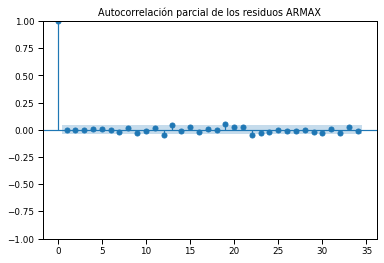

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#With PACF see possible spikes: AR 
sns.set_context("paper")
plot_pacf(arma_model.resid)
plt.title("Autocorrelación parcial de los residuos ARMAX")
plt.show()

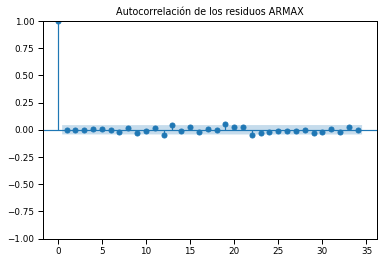

In [30]:
sns.set_context("paper")
#With ACF see possible spikes: MA
plot_acf(arma_model.resid)
plt.title("Autocorrelación de los residuos ARMAX")
plt.show()

In [39]:
import warnings
warnings.filterwarnings("ignore")

predictions = []
for i in range(0,len(test)):
    arma_temp = ARIMA(Y_data[0:int(dim[0]*0.85+i)], exog=Arma_constant_data[0:int(dim[0]*0.85+i), :], order=(1, 0, 5)).fit()
    
    pred_1_step = arma_temp.forecast(exog=Arma_constant_data[int(dim[0]*0.85+i+1),:])
    value = pred_1_step[0]
    
    predictions.append(value)

IndexError: index 2463 is out of bounds for axis 0 with size 2463

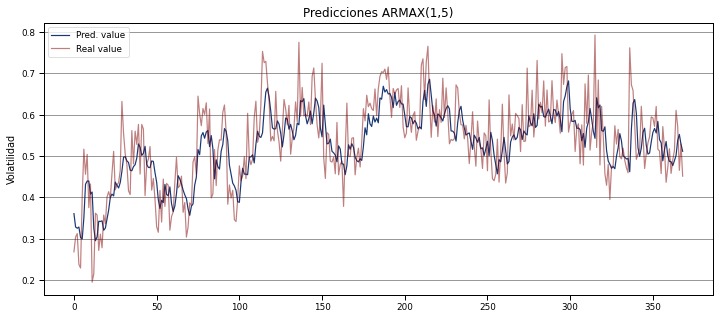

In [40]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


#plt.scatter(x = range(0,len(predictions)), y = predictions, color='#002366', alpha = 1)
plt.plot(range(0,len(predictions)), predictions, alpha = 0.9, color = '#002366', label = "Pred. value")

#plt.scatter(x = range(0,len(predictions)), y = test, color='maroon', alpha = 1)
plt.plot(range(0,len(Y_data[int(dim[0]*0.85):-1])), Y_data[int(dim[0]*0.85):-1], alpha = 0.5, color = 'maroon', label = "Real value")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Predicciones ARMAX(1,5)", fontsize = 12)
plt.ylabel("Volatilidad")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_data[int(dim[0]*0.85):-1], predictions)
print('Test MSE: %.6f' % mse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_data[int(dim[0]*0.85):-1], predictions)
print('Test MAE: %.6f' % mae)

from sklearn.metrics import r2_score

print("El pseudo R2 obtenido es: "+ str(round(r2_score(Y_data[int(dim[0]*0.85):-1], predictions),4)))

Test MSE: 0.004909
Test MAE: 0.053965
El pseudo R2 obtenido es: 0.5578


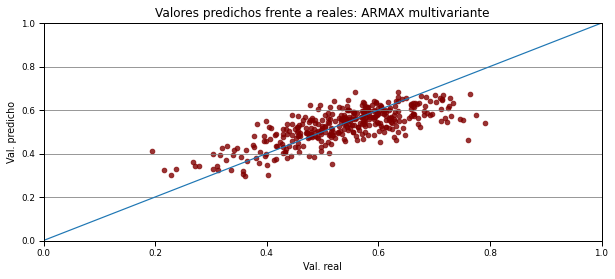

In [42]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))

plt.scatter(Y_data[int(dim[0]*0.85):-1],predictions, c= "maroon", alpha=0.8)

plt.axline([0, 0], slope=1)
plt.xlim(0, 1) 
plt.ylim(0, 1) 
plt.title("Valores predichos frente a reales: ARMAX multivariante", fontsize = 12)
plt.xlabel("Val. real")
plt.ylabel("Val. predicho")
plt.grid(axis = "y", color = "0.5")
plt.show()

---

# MODELO NAR

In [43]:
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.utils.display_results import results

ylags = 10

basis_function = Polynomial(degree=3)
model_nar = FROLS(
    order_selection=True,
    ylag=ylags,xlag=[1,1,1,1,1], # the lags for all models will be 13
    basis_function=basis_function,
    info_criteria='aic',
    estimator='least_squares')

In [44]:
nar_y =  Y_data[0:int(dim[0]*0.85)].reshape(-1, 1)
model_nar.fit(X=Arma_constant_data[0:int(dim[0]*0.85), :], y=nar_y)
r = pd.DataFrame(
    results(
        model_nar.final_model, model_nar.theta, model_nar.err,
        model_nar.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)

            Regressors   Parameters             ERR
0               y(k-1)   4.3961E-01  9.60351777E-01
1               y(k-2)   1.8085E-01  7.05849452E-03
2                    1   1.1871E-01  2.02374115E-03
3  x3(k-1)y(k-8)y(k-3)  -1.1267E-01  1.50504910E-03
4  x2(k-1)y(k-4)y(k-3)   3.9492E-01  5.14660813E-04
5       x3(k-1)y(k-10)   8.1858E-01  9.67853864E-05
6        x2(k-1)y(k-1)  -5.9117E-01  8.68084444E-05
7     x3(k-1)y(k-10)^2  -7.5010E-01  7.70887634E-05
8  x2(k-1)y(k-8)y(k-3)   4.0661E-01  1.31481368E-04
9             y(k-1)^2   1.9390E-01  8.95901656E-05


In [41]:
yhat = model_nar.predict(X=Arma_constant_data[int(dim[0]*0.85)-ylags:, :]
                     , y=Y_data[int(dim[0]*0.85)-ylags:].reshape(-1, 1))

In [45]:
nar_pred =  Y_data[int(dim[0]*0.85):].reshape(-1, 1)
pred_nar = []
y_test = np.concatenate([train[-model_nar.max_lag:], test])
for i in range(0,len(Y_data[int(dim[0]*0.85):])):
    
    pred_1_step = model_nar.predict(y = Y_data[int(dim[0]*0.85)+i-ylags:int(dim[0]*0.85)+i].reshape(-1, 1),
                                    X = Arma_constant_data[int(dim[0]*0.85)+i-ylags:int(dim[0]*0.85)+i+1, :])
    value = pred_1_step[ylags]
    
    pred_nar.append(value)
pred_nar = np.array(pred_nar)

In [36]:
model_nar.predict(y = Y_data[int(dim[0]*0.85)+i-ylags:int(dim[0]*0.85)+i].reshape(-1, 1),
                                    X = Arma_constant_data[int(dim[0]*0.85)+i-ylags:int(dim[0]*0.85)+i, :],
                                    forecast_horizon=100, steps_ahead=100)

array([[0.51259549],
       [0.61026914],
       [0.57051899],
       [0.46500688],
       [0.52878702]])

In [33]:
range(0,len(Y_data[int(dim[0]*0.85):]))
int(dim[0]*0.85)-ylags
#print(Y_data[int(dim[0]*0.85)-ylags:int(dim[0]*0.85)])

2082

In [46]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_data[int(dim[0]*0.85):], pred_nar)
print('Test MSE: %.6f' % mse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_data[int(dim[0]*0.85):], pred_nar)
print('Test MAE: %.6f' % mae)

from sklearn.metrics import r2_score

print("El pseudo R2 obtenido es: "+ str(round(r2_score(Y_data[int(dim[0]*0.85):], pred_nar),5)))

Test MSE: 0.005129
Test MAE: 0.055280
El pseudo R2 obtenido es: 0.53746


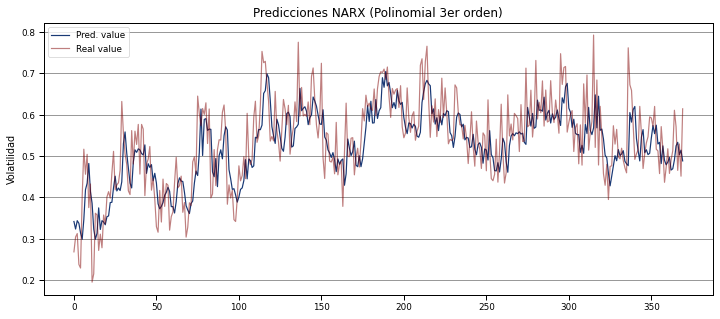

In [47]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (12,5))


#plt.scatter(x = range(0,len(predictions)), y = predictions, color='#002366', alpha = 1)
plt.plot(range(0,len(pred_nar)), pred_nar, alpha = 0.9, color = '#002366', label = "Pred. value")

#plt.scatter(x = range(0,len(predictions)), y = test, color='maroon', alpha = 1)
plt.plot(range(0,len(Y_data[int(dim[0]*0.85):])), Y_data[int(dim[0]*0.85):], alpha = 0.5, color = 'maroon', label = "Real value")

plt.legend()
plt.ticklabel_format(useOffset=False) 
plt.title("Predicciones NARX (Polinomial 3er orden)", fontsize = 12)
plt.ylabel("Volatilidad")
#plt.xlabel("Iteraciones")
plt.grid(axis = "y", color = "0.5")
plt.show()

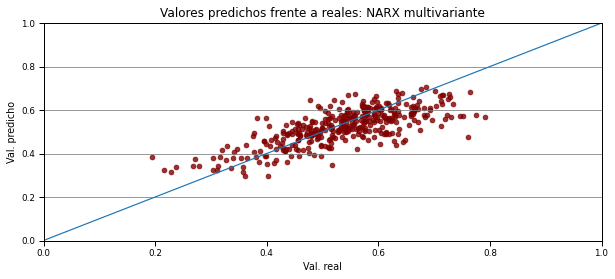

In [48]:
sns.set_context("paper")
fig, ax = plt.subplots(figsize = (10,4))

plt.scatter(Y_data[int(dim[0]*0.85):],pred_nar, c= "maroon", alpha=0.8)

plt.axline([0, 0], slope=1)
plt.xlim(0, 1) 
plt.ylim(0, 1) 
plt.title("Valores predichos frente a reales: NARX multivariante", fontsize = 12)
plt.xlabel("Val. real")
plt.ylabel("Val. predicho")
plt.grid(axis = "y", color = "0.5")
plt.show()